# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


We have 1470 rows and 35 columns in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have 9 features with Object type data.

Lets check is there any missing values

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset.

## Exploratory Data Analysis

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations
1. There are no missing values.
2. Categorical columns -> Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,
   PerformanceRating,RelationshipSatisfaction, StockOptionLevel.
3. Seems like EmployeeCount is a constant value.
4. Nominal features - DistanceFromHome,EmployeeCount,EmployeeNumber

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There are 1233 employees who does not leave the company and 237 employee who left the company.

### Data Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

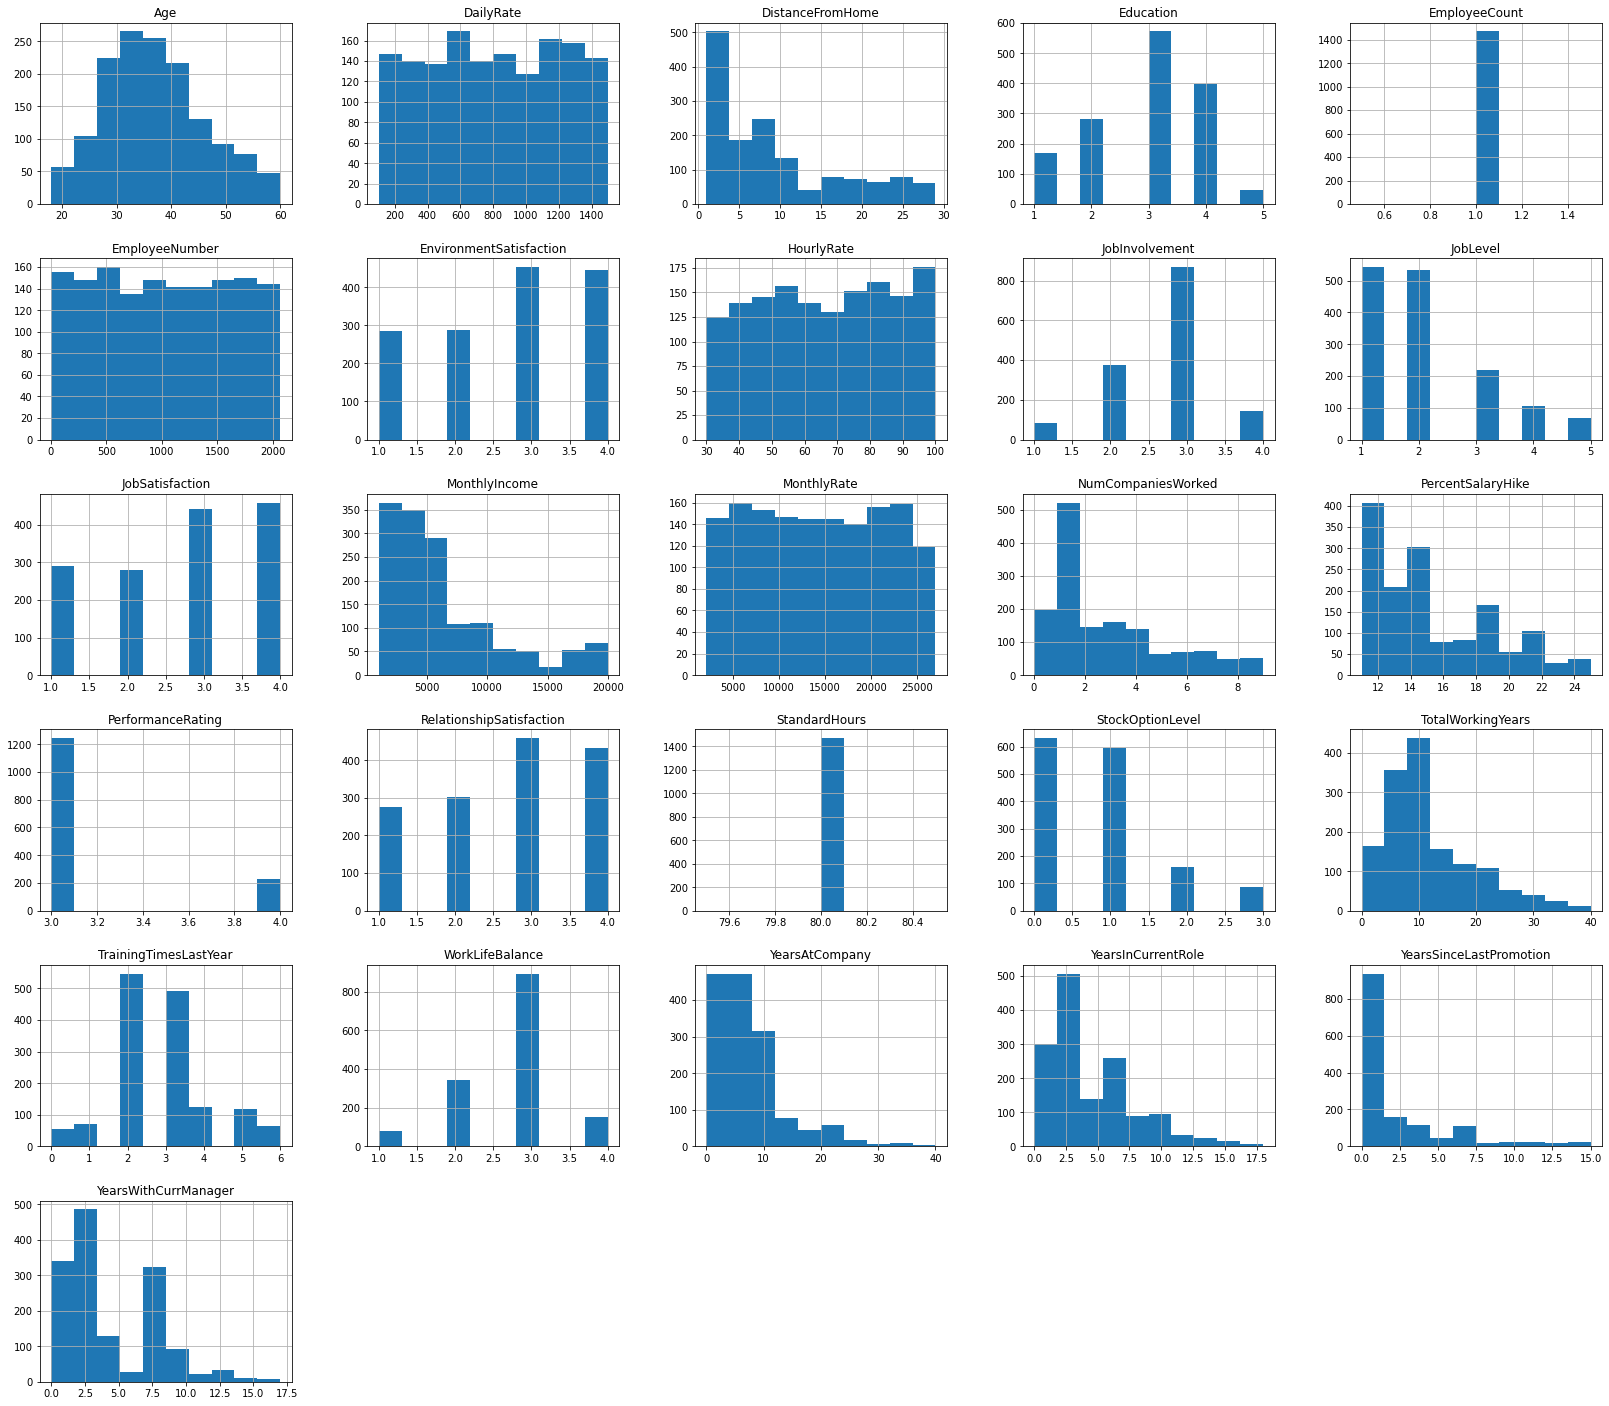

In [8]:
df.hist(figsize=(28,25))

Observations from above plots.
1. catrgorical features - Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating, RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
2. nominal features - EmployeeCount,StandardHours

#### Univariate Analysis

##### Lets check whether the data is normally distributed

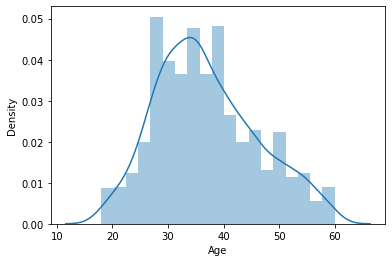

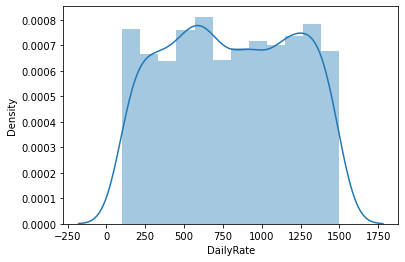

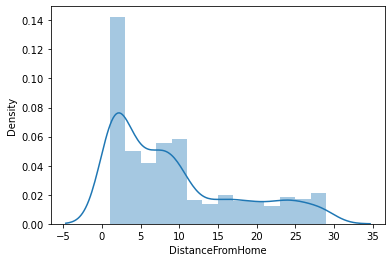

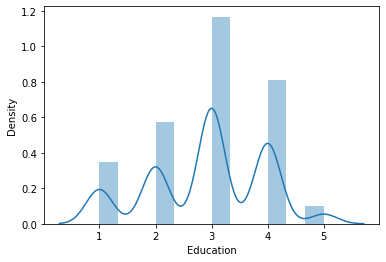

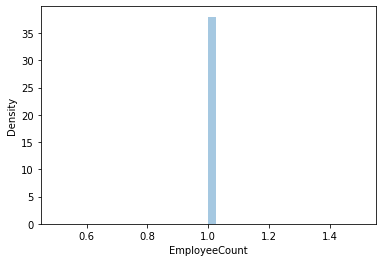

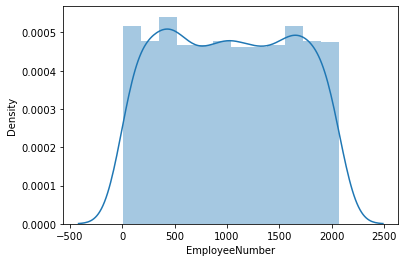

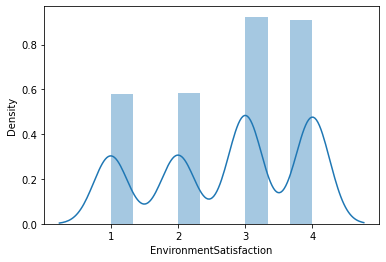

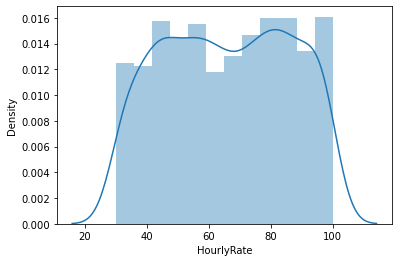

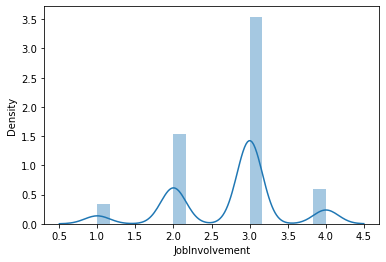

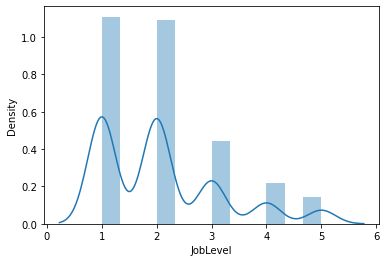

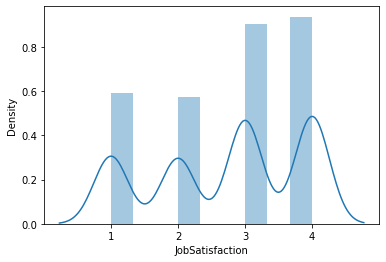

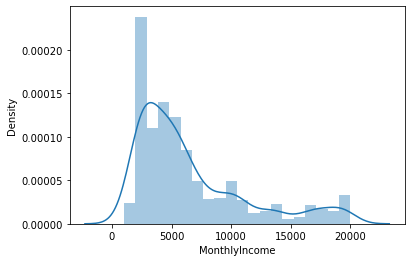

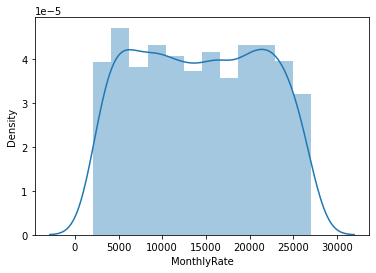

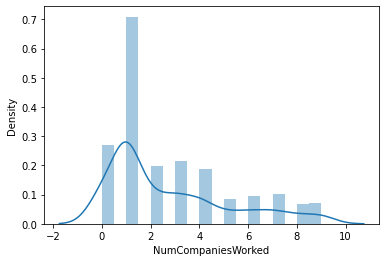

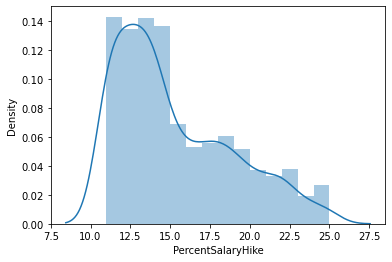

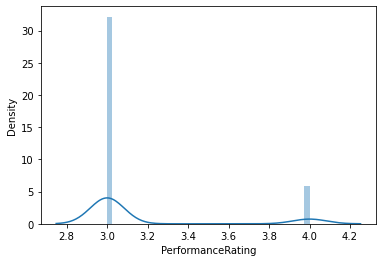

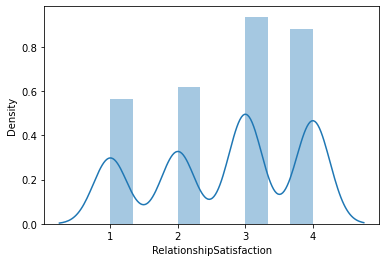

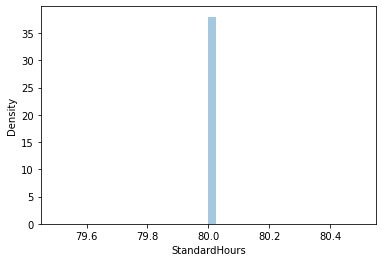

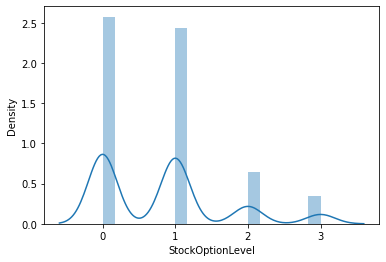

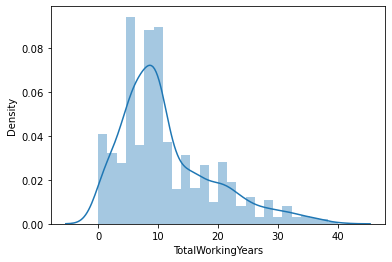

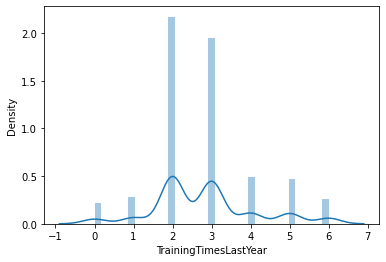

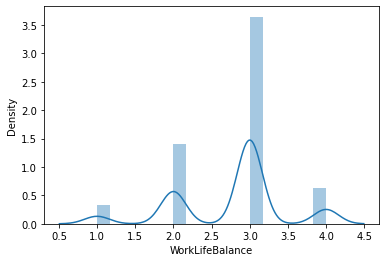

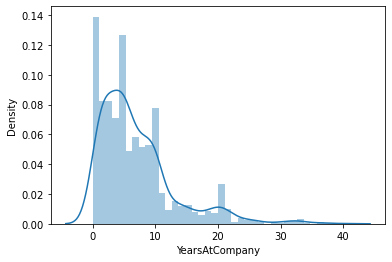

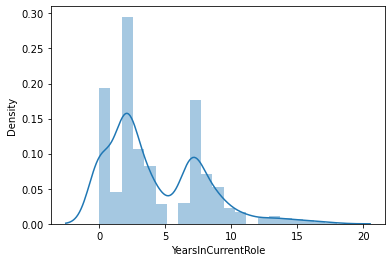

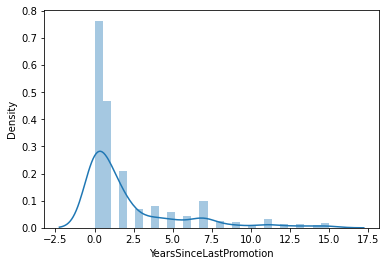

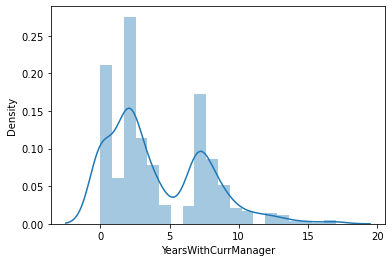

In [9]:
integer_features=[]
for col in df.columns:
    if df[col].dtype=='int64':
        integer_features.append(col)
for col in integer_features:
    plt.figure(figsize=(6,4))
    sns.distplot(df[col])
    plt.show()

We can see almost all the continous features are not normally distributed except Age.

In [10]:
continous_features=['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

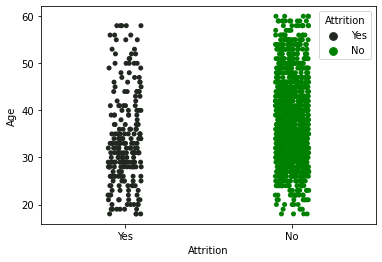

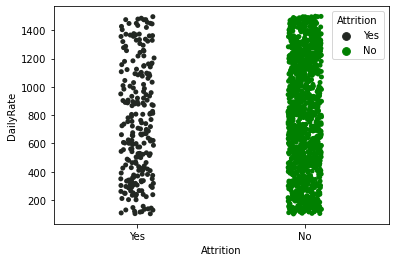

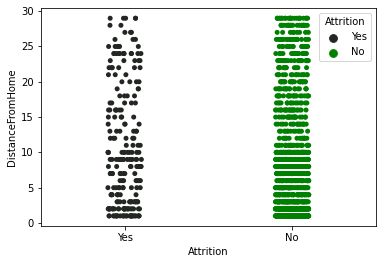

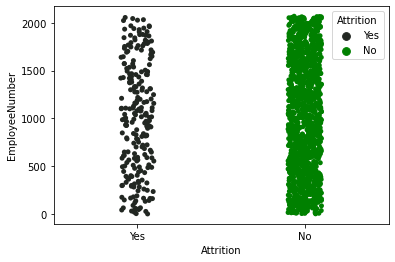

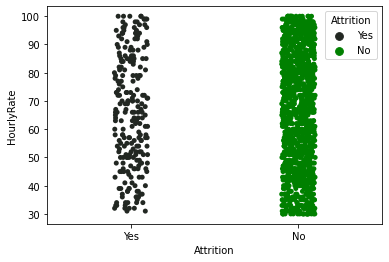

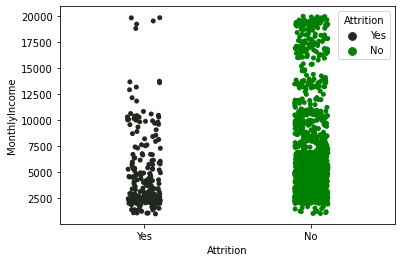

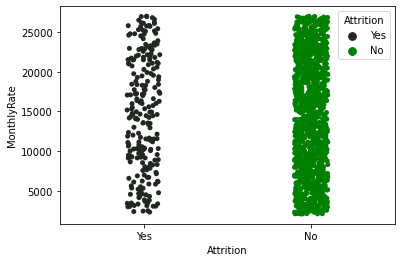

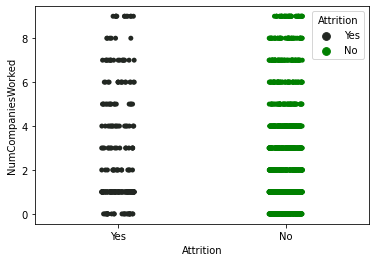

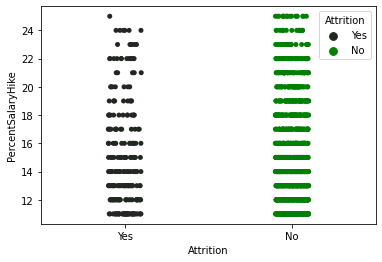

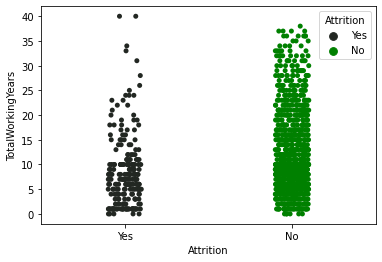

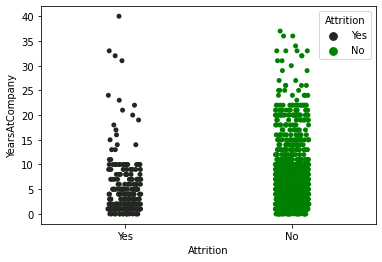

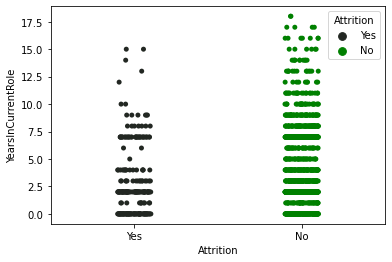

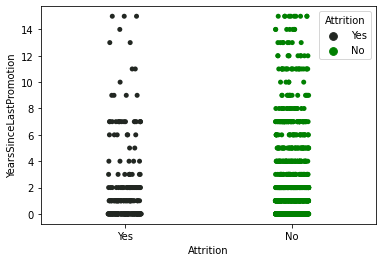

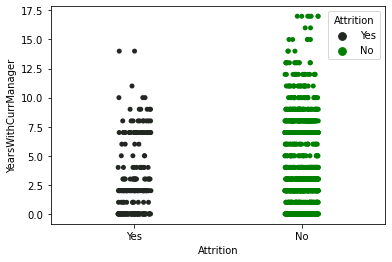

In [11]:
for col in continous_features:
    plt.figure(figsize=(6,4))
    sns.stripplot(df['Attrition'],df[col],hue=df['Attrition'],color='g')
    plt.show()

Observations from above stip plot.
1. Employees whose age are between 25 to 35 are most likely to leave the company.
2. Employees whose monthly income is less than 10000 are mostly leaving the company.
3. Employees whose total working years less than 10 are mostly leaving the company.
4. Employees whose years at company is less than 10 are mostly leaving the company.
5. Employess who are working less than 7.5 years in current role are mostly leaving the company.
6. Employess who got their last promotion between 0 to 2 years are mostly leaving the company.
7. Employess who are working with current manager for less than 7.5 years are mostly leaving the company.

In [12]:
int_cat_features=[]
for col in integer_features:
    if col not in continous_features:
        int_cat_features.append(col)
str_categorical_features=[]
categorical_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        str_categorical_features.append(col)
categorical_features=int_cat_features+str_categorical_features
categorical_features

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64 



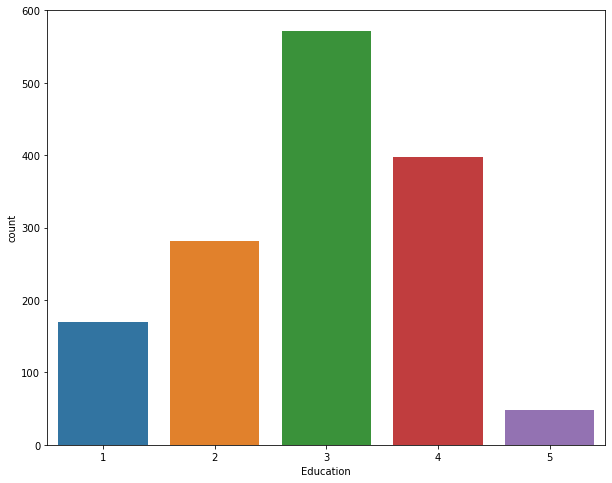

EmployeeCount
1    1470
Name: EmployeeCount, dtype: int64 



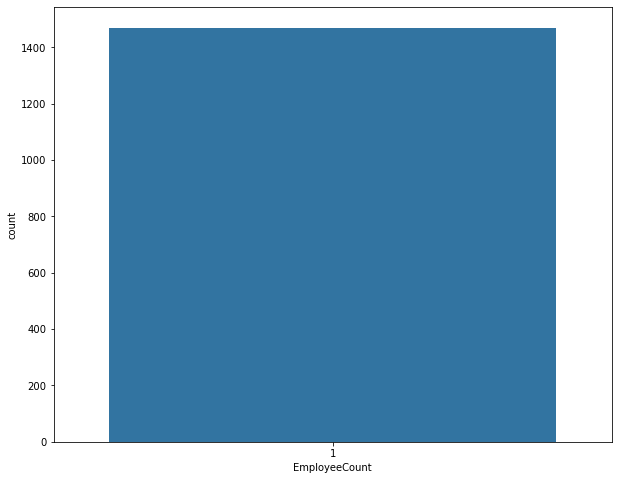

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64 



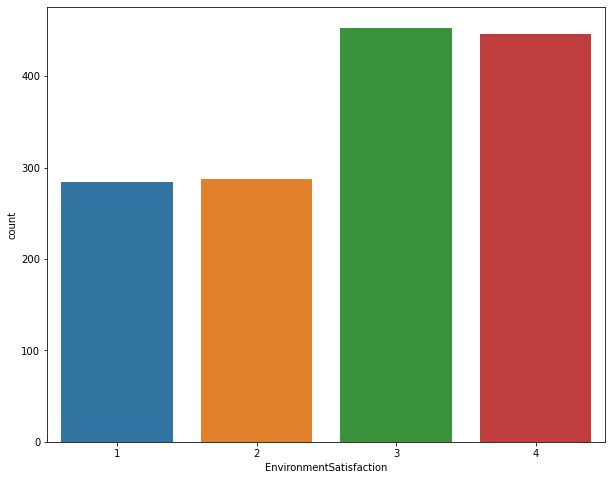

JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64 



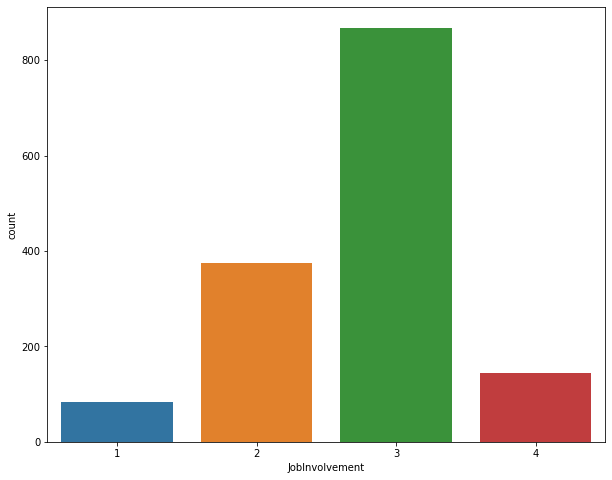

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64 



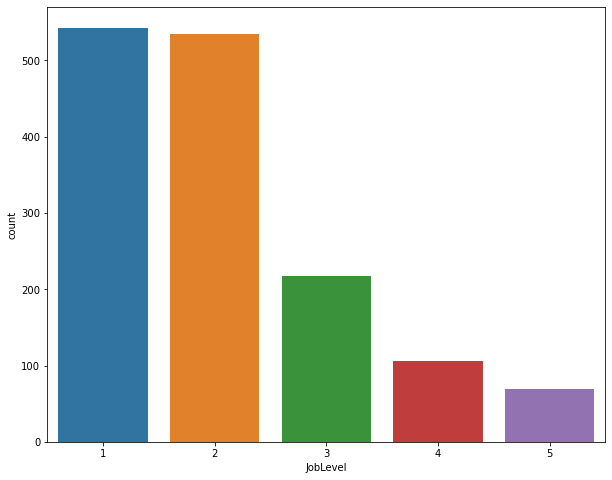

JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64 



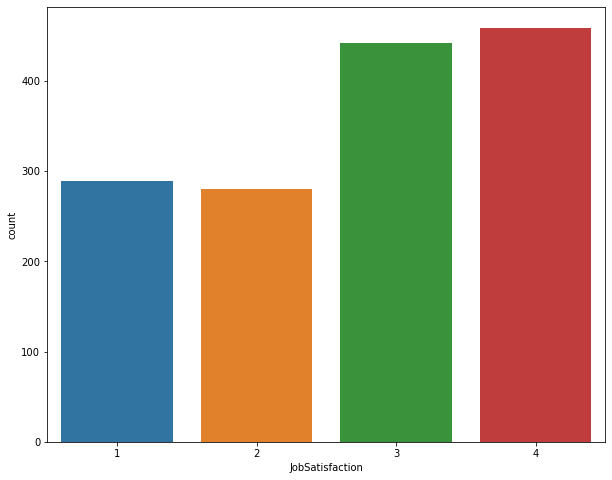

PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64 



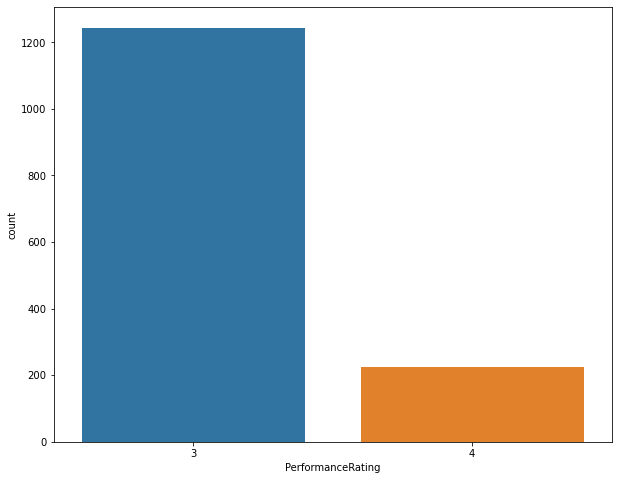

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64 



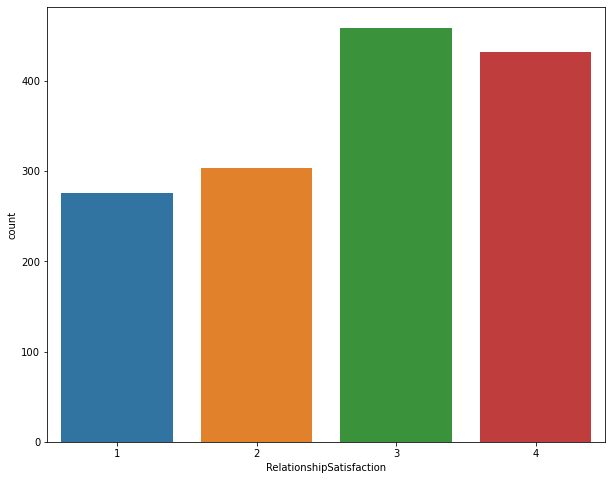

StandardHours
80    1470
Name: StandardHours, dtype: int64 



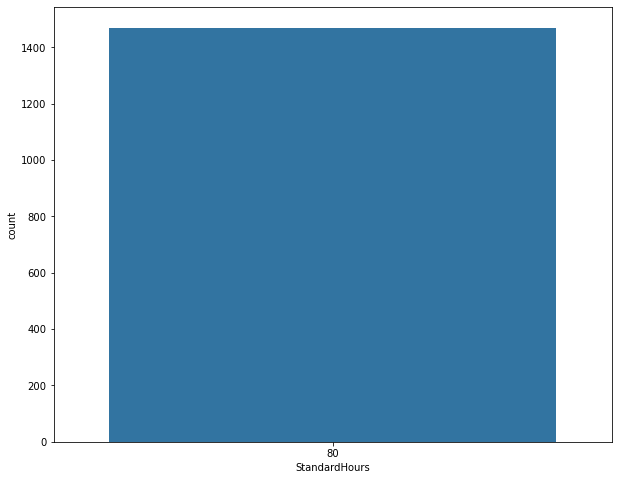

StockOptionLevel
0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64 



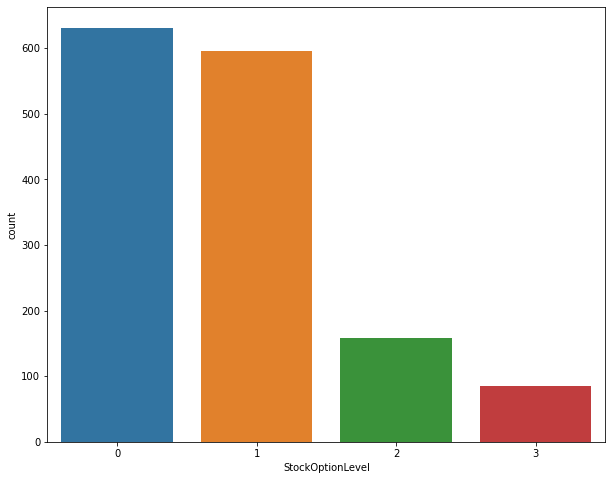

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64 



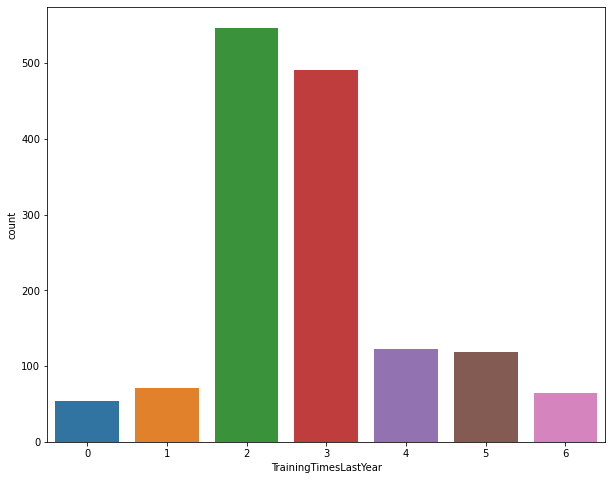

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64 



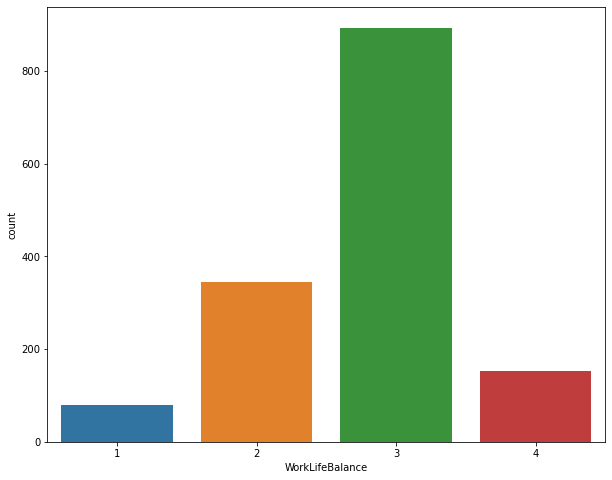

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64 



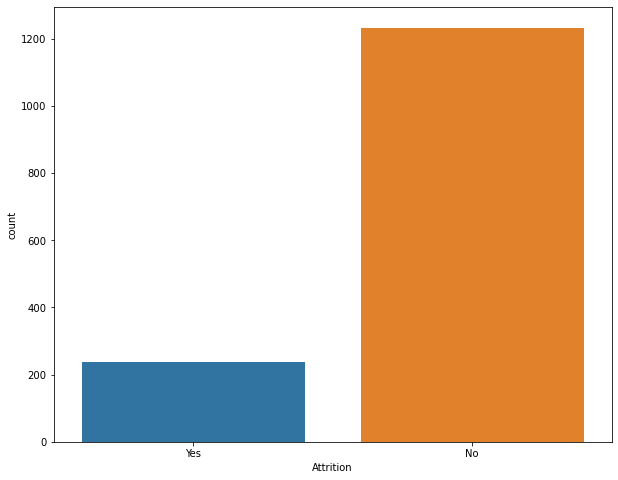

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 



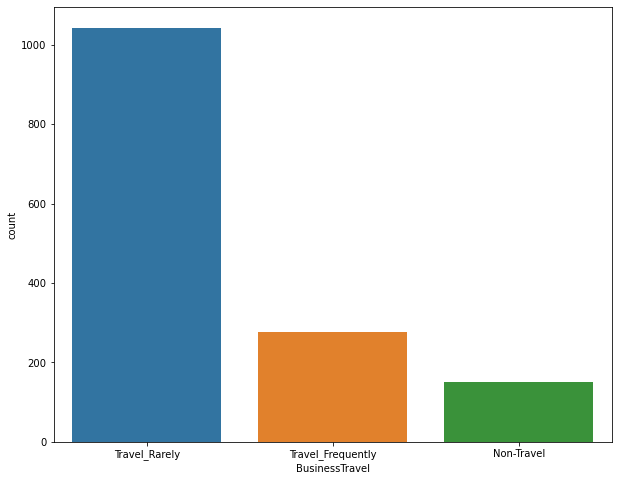

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 



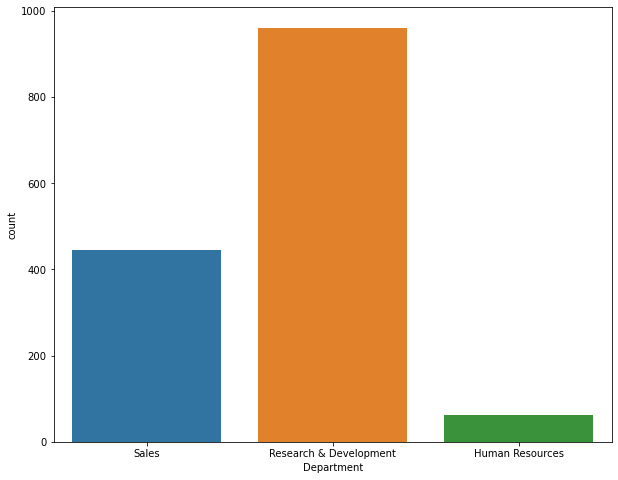

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 



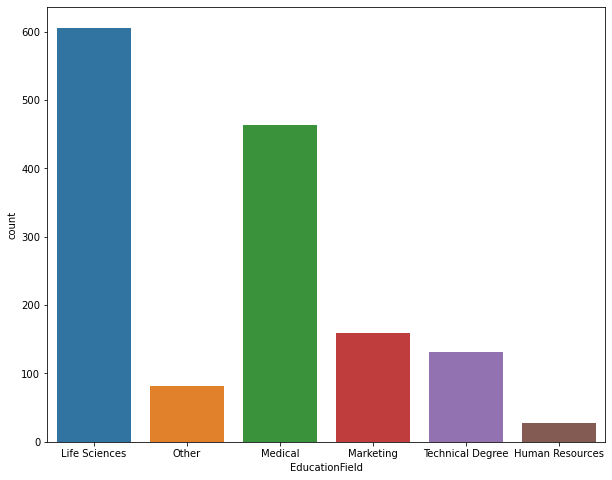

Gender
Male      882
Female    588
Name: Gender, dtype: int64 



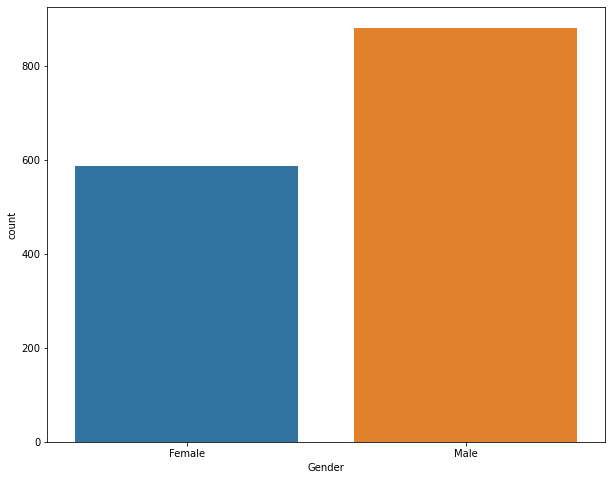

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 



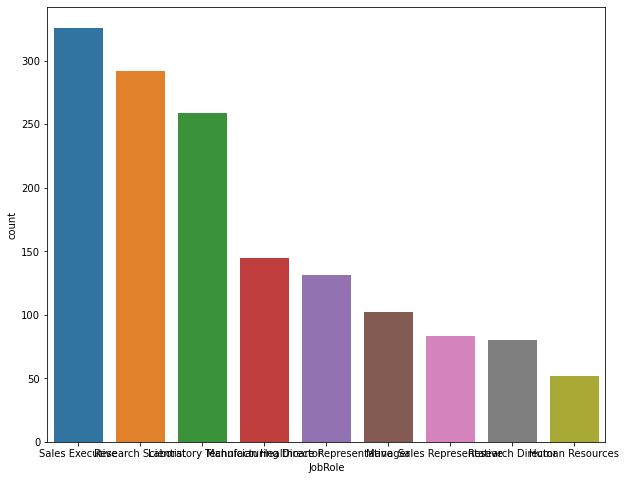

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 



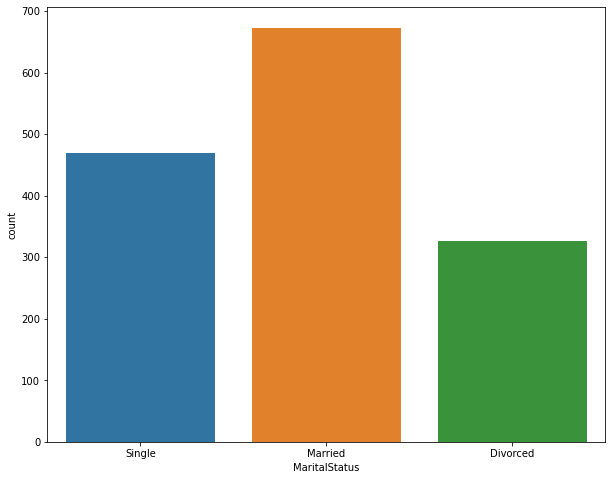

Over18
Y    1470
Name: Over18, dtype: int64 



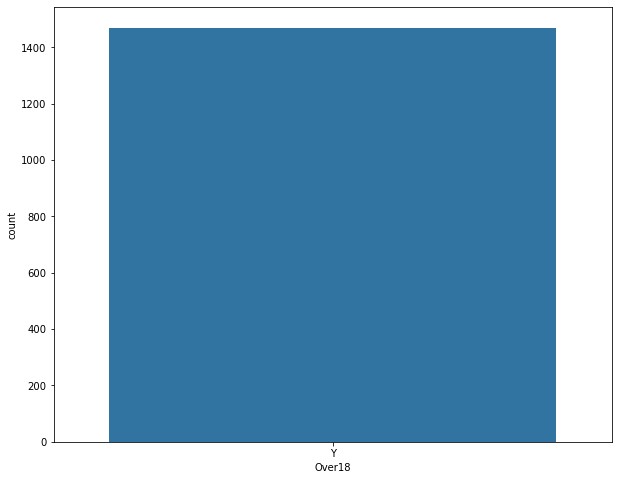

OverTime
No     1054
Yes     416
Name: OverTime, dtype: int64 



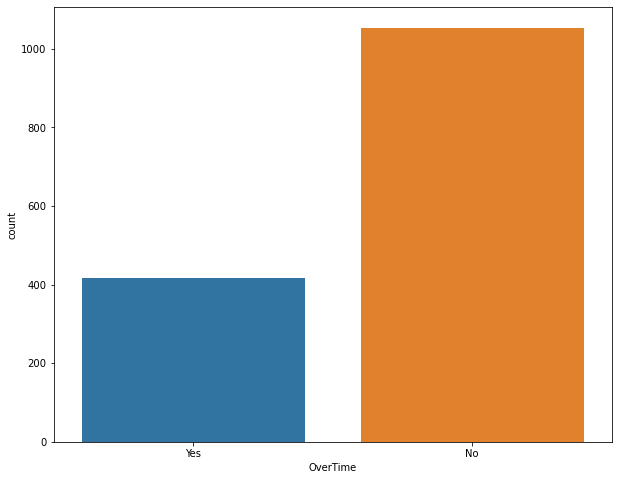

In [13]:
for feature in categorical_features:
    print(feature)
    print(df[feature].value_counts(),'\n')
    plt.figure(figsize=(10,8))
    sns.countplot(df[feature])
    plt.show()

Observations from above plots
1. In our dataset we have more people who do business travel very rarely and less people who does not travel at all.
2. We have 3 departments. More employess are from Research&Development department, then followed by Sales and HR.
3. We have 6 catrgory of educational field.We have employees who studied LifeScience and followed by Medical are more than other categories.
4. There are Male employees are more than female employees.
5. We have 326 employess who are working as Sales Executive and 292 as Reserach Scientist and 259 as Laboratory Technician and followed by few other job roles.
6. There are more employees whose marital status is married and followed by singles.
7. All the employees whose age are above 18 years.
8. We have less employess who do overtime.
9. We have more number of employees whose JobInvolvement is 3 and very less number of employees with JobInvolvement 1.It shows that we have more employess with medium level of invlovment. Not too involved and not too bad.
10. We have 5 different JobLevels. More employees from level 1 and 2 and then followed by 3. When more the JobLevel, the employees count is less.
11. We have scale between 1 to 4 for job satifaction and most employees are satified with their job fully(4).
12. We have performance rating scale as 3 and 4. More employees got rating 3.
13. For relationship satisfaction we have sclae between 1 to 4 and more employees are moderately satisfied(3), then followed by completely satisfied.
14. We have more employees who does not buy any stock from company and followeed by stock option level 1.
15. There are more employees who got their trainings 2 times in the last year and followed by employees who got their trainings 3 times.
16. We have scale between 1 to 4 for work life balanace of an employee and we have more employees who are moderately able to maintain their work life balance and we have very less employees who does not able to manage their work life balance.


##### Lets plot categorical plot and see how the data is distributed among the categories.

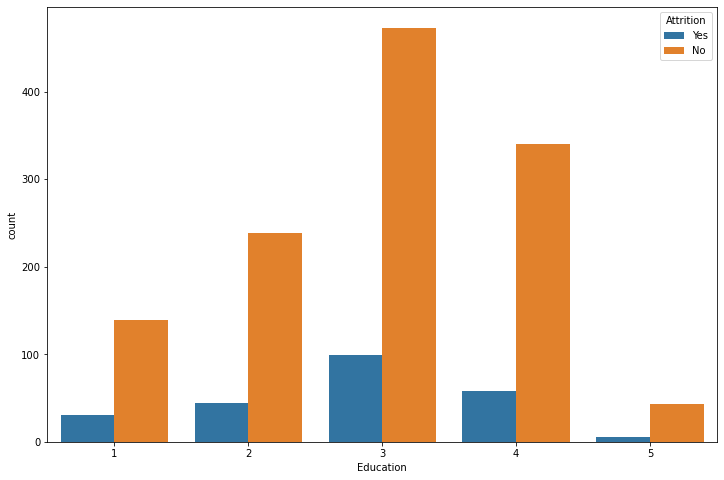

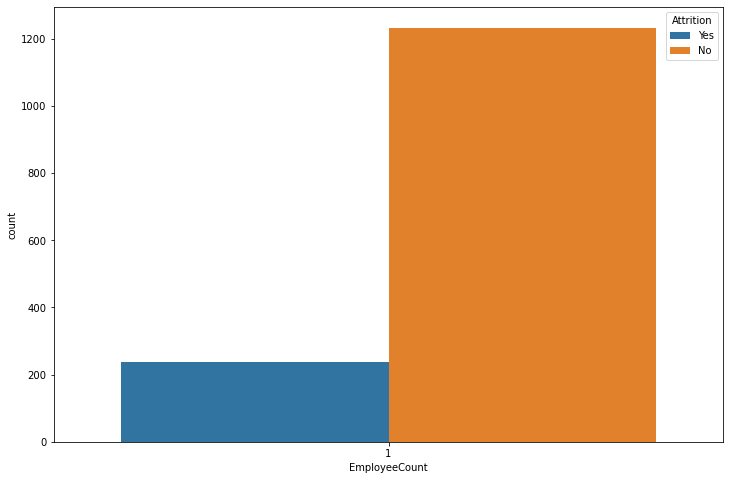

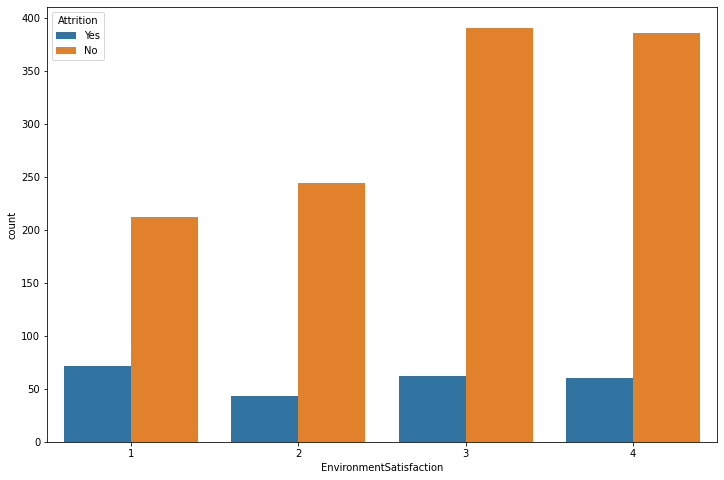

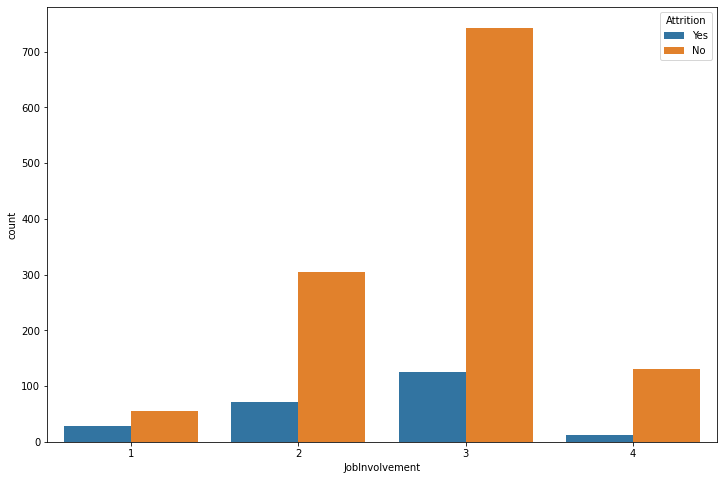

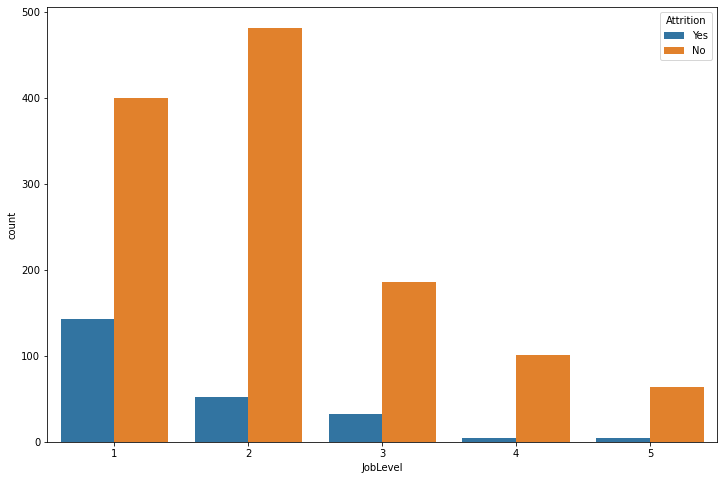

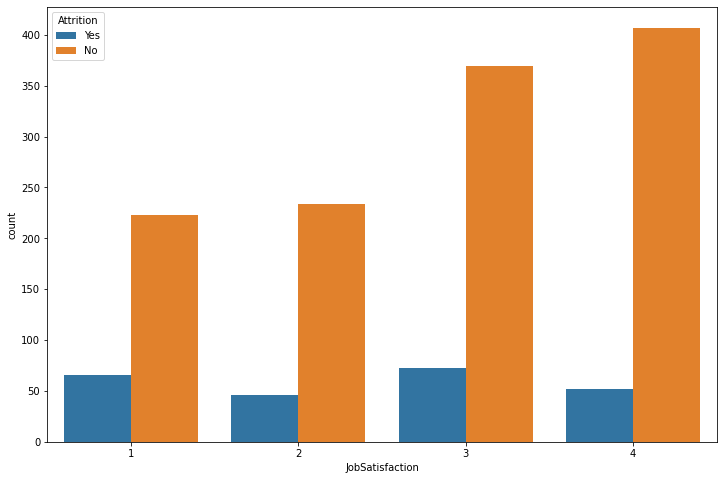

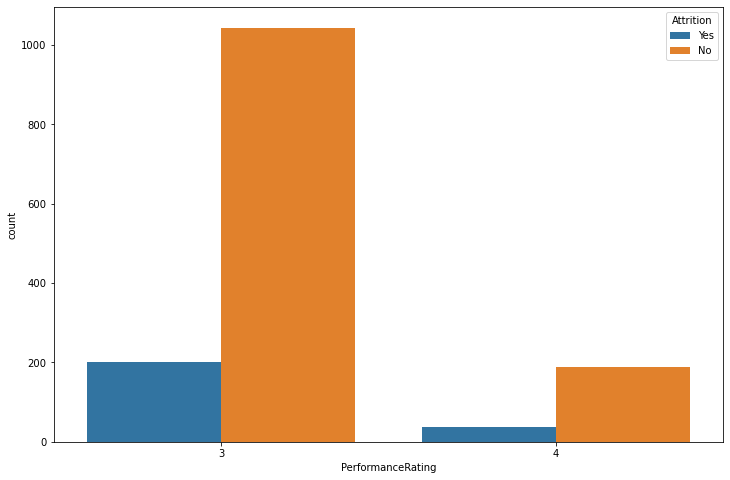

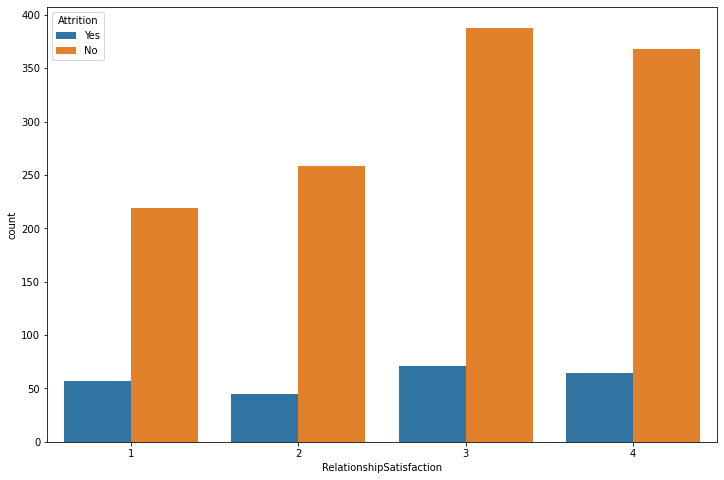

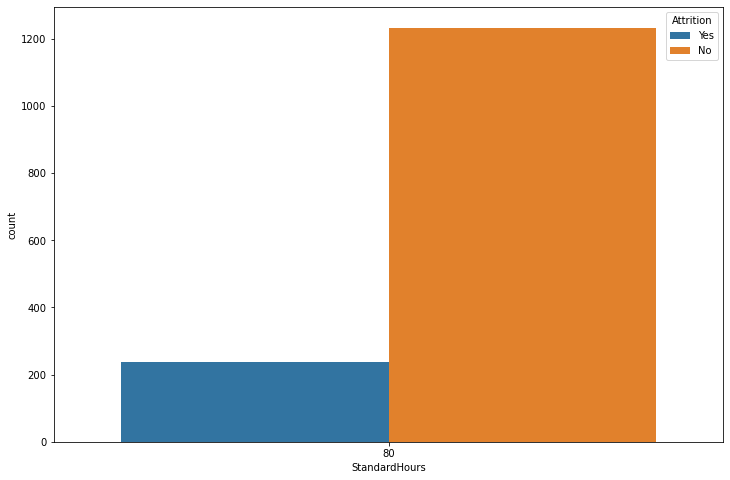

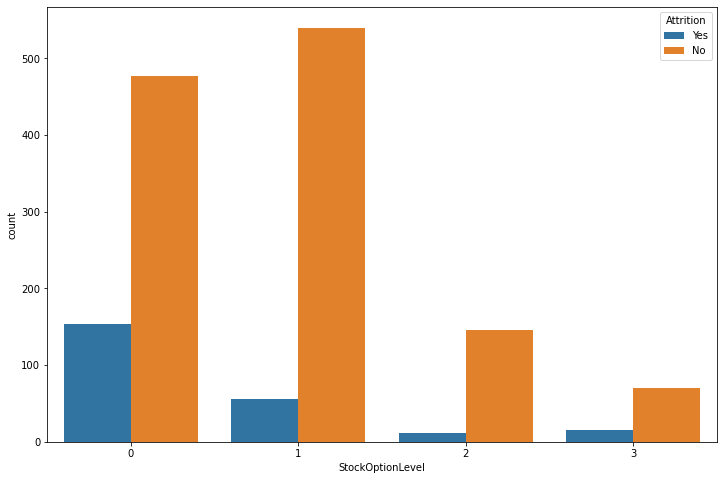

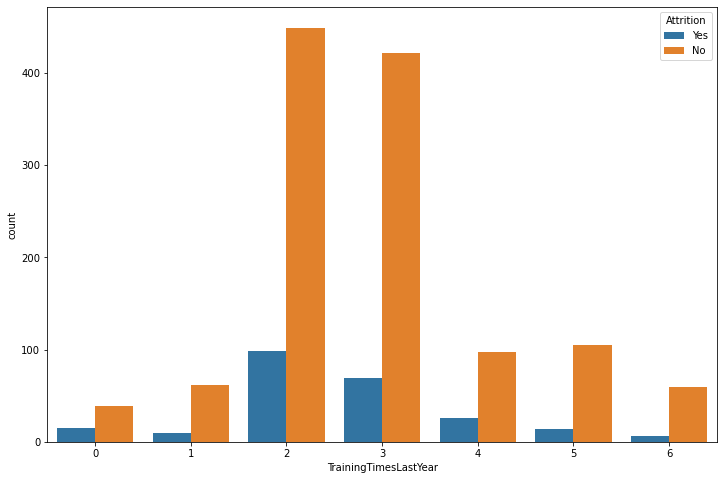

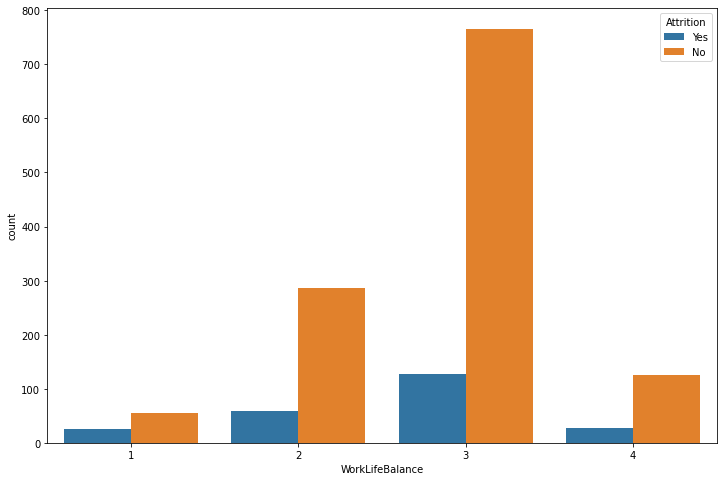

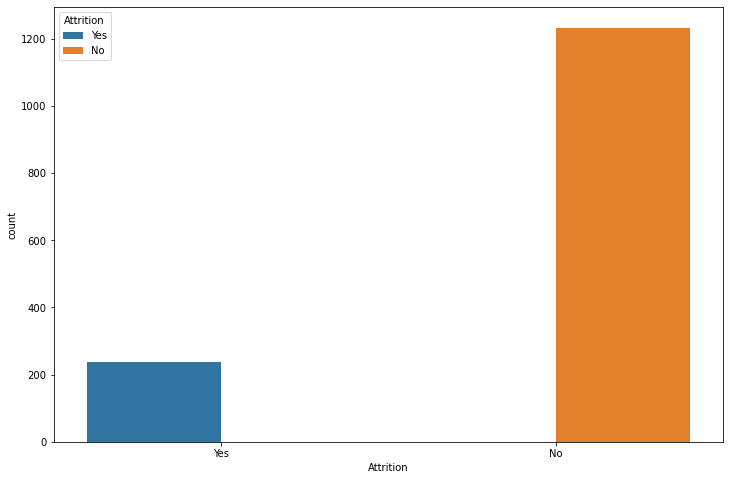

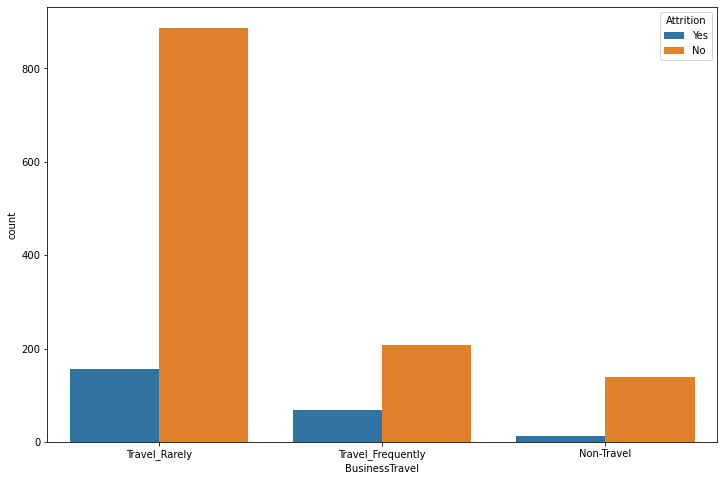

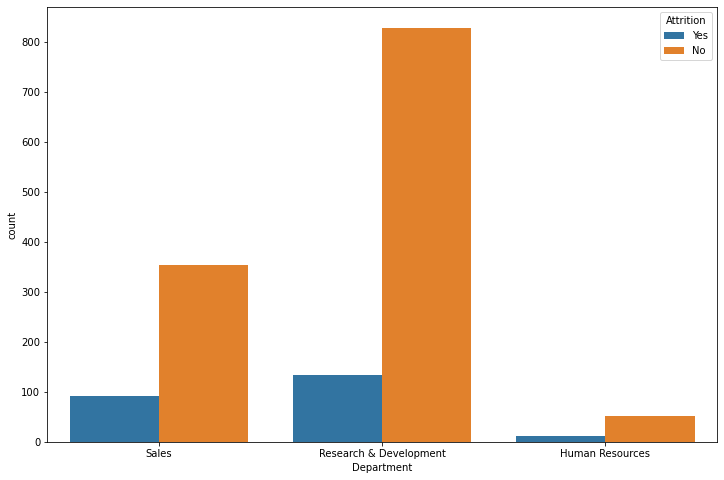

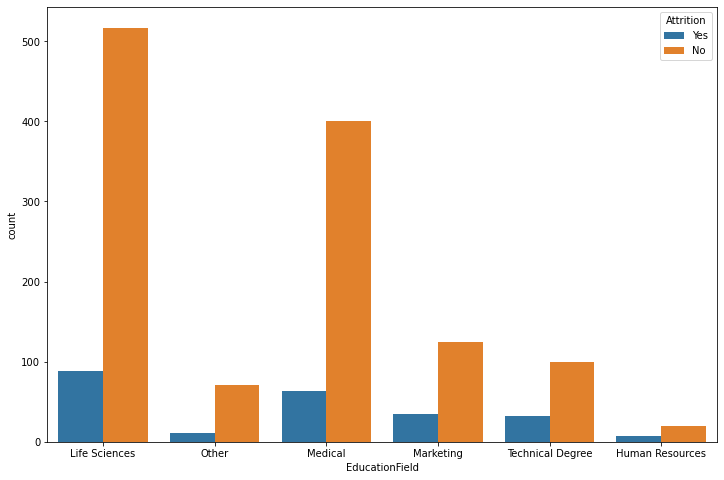

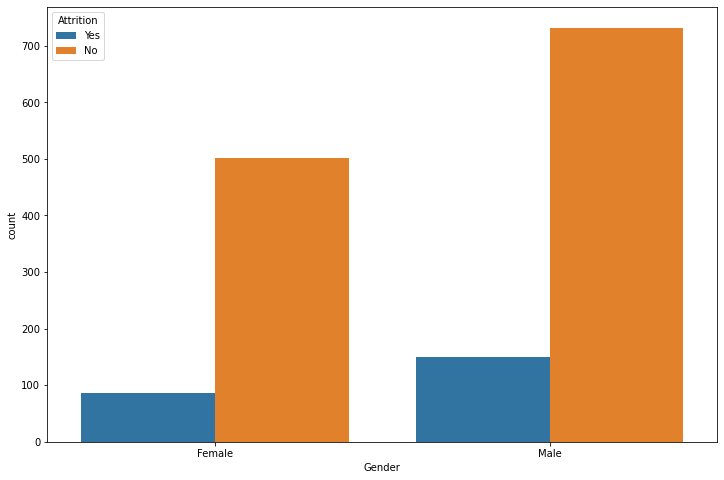

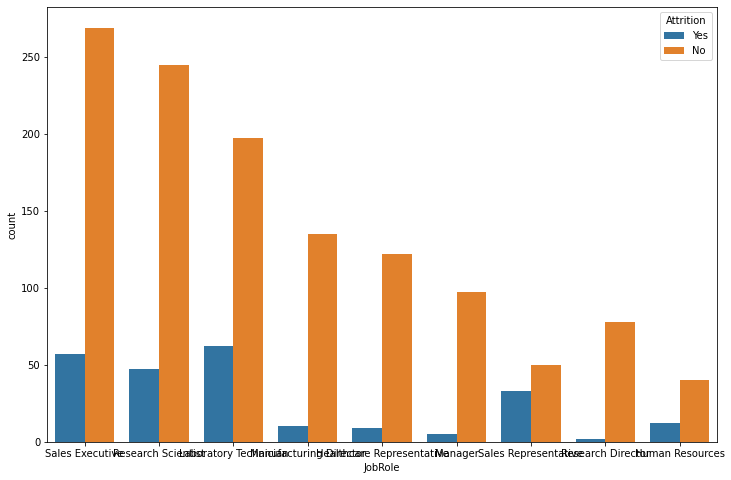

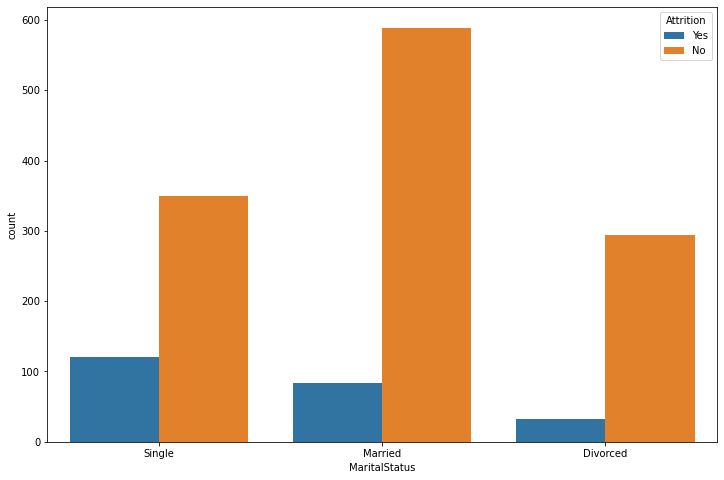

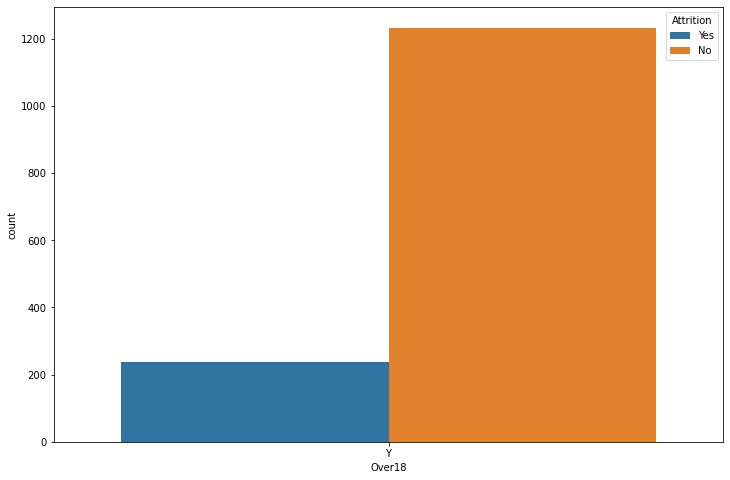

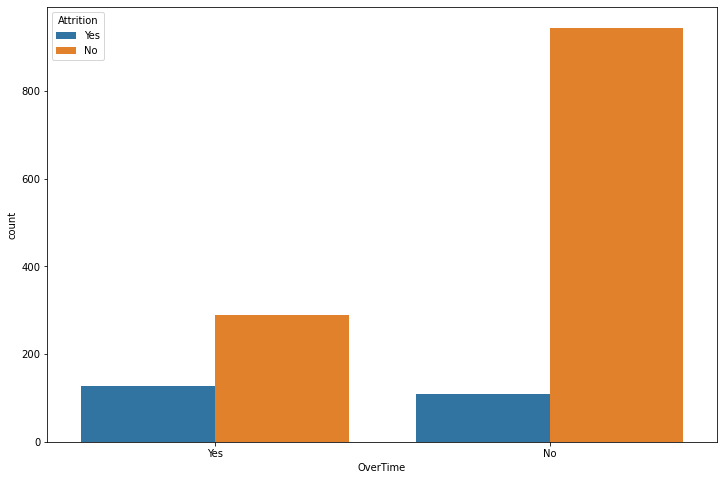

In [14]:
for col in categorical_features:
    plt.figure(figsize=(12,8))
    sns.countplot(df[col],hue=df['Attrition'])
    plt.show()

Observations:
1. Employees who travel rarely are mostly leaving the company.
2. Employess who work from Research&Development department are leaving the company more and followed by Sales department.
3. More male employees are leaving the company than female employees.
4. Employees who works as Laboratory technicians are leaving the company more and followed by Sales Executives and Reseacrch scientist.
5. Employees whose marital status is single are leaving the company more.
6. Employees whose education level 3 are leaving the company more, then followed by 4 and 2.
7. Employees who does not have good environmental satisfaction are leaving the company more.
8. Employees who have moderate jobinvlovement level are leaving the company more.
9. Employees who works in level 1 jobs are leaving the company more.
10. Employees who got performance rating 3 are leaving the company more.
11. Employees who does not have stock options are leaving the company more.

#### Bivariate Analysis

<Figure size 432x288 with 0 Axes>

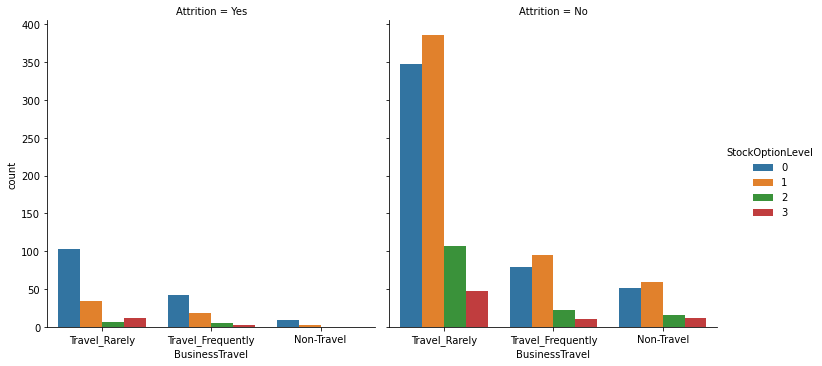

In [15]:
plt.figure(figsize=(6,4))
sns.catplot(x='BusinessTravel',hue='StockOptionLevel',col='Attrition',kind='count',data=df)
plt.show()

<Figure size 432x288 with 0 Axes>

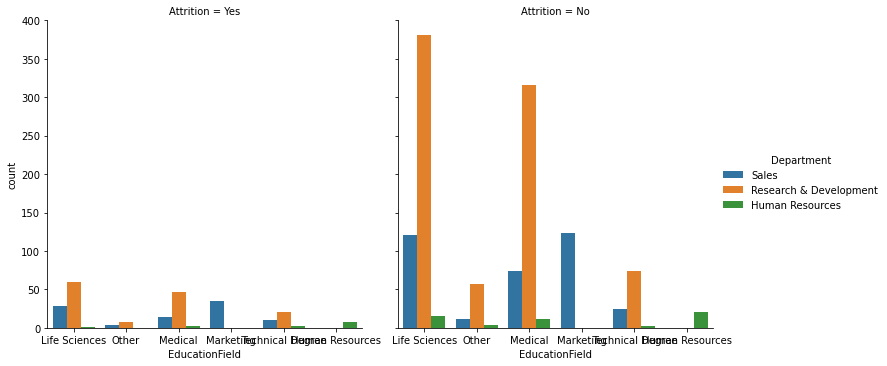

In [16]:
plt.figure(figsize=(6,4))
sns.catplot(x='EducationField',hue='Department',col='Attrition',kind='count',data=df)
plt.show()

1. People who studied LifeScience and Medical are working more in Research&Development department.
2. People who studied Marketting are working more under Sales department

<Figure size 432x288 with 0 Axes>

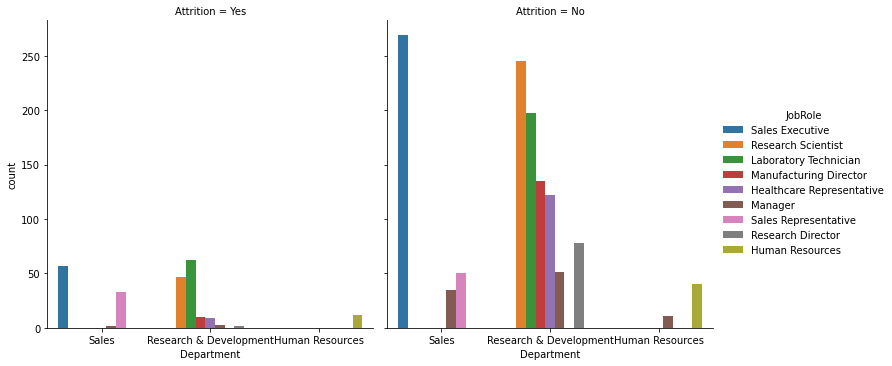

In [17]:
plt.figure(figsize=(6,4))
sns.catplot(x='Department',hue='JobRole',col='Attrition',kind='count',data=df)
plt.show()

1. Under Reseacrh&Development department we have more job roles.

<Figure size 432x288 with 0 Axes>

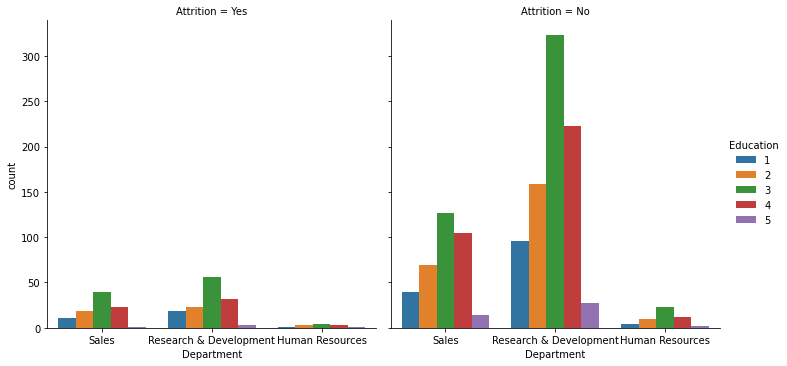

In [18]:
plt.figure(figsize=(6,4))
sns.catplot(x='Department',hue='Education',col='Attrition',kind='count',data=df)
plt.show()

1. People who works under Research& development department and whose education level is 3 are more likely to leave the company

<Figure size 432x288 with 0 Axes>

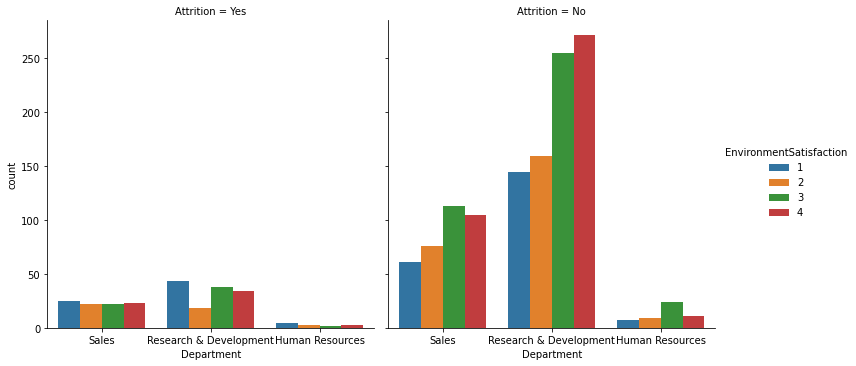

In [19]:
plt.figure(figsize=(6,4))
sns.catplot(x='Department',hue='EnvironmentSatisfaction',col='Attrition',kind='count',data=df)
plt.show()

1. People who works in Research&Developement department and who are having bad environment satisfaction are more likely to leave the company.
2. In all the departments, employees with less Environment Satisfacation are leaving the company more.

<Figure size 432x288 with 0 Axes>

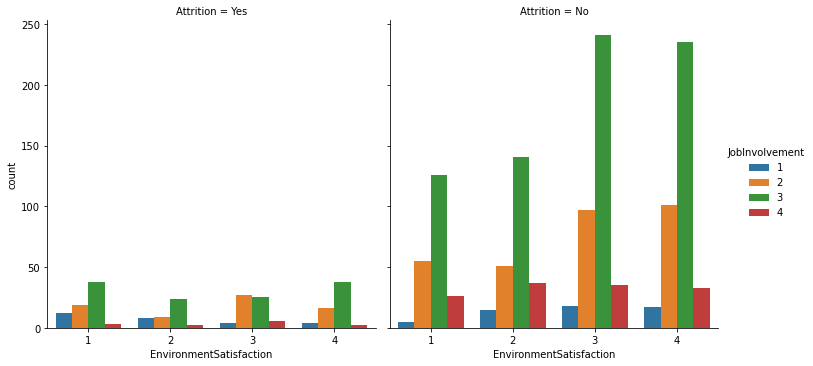

In [20]:
plt.figure(figsize=(6,4))
sns.catplot(x='EnvironmentSatisfaction',hue='JobInvolvement',col='Attrition',kind='count',data=df)
plt.show()

<Figure size 432x288 with 0 Axes>

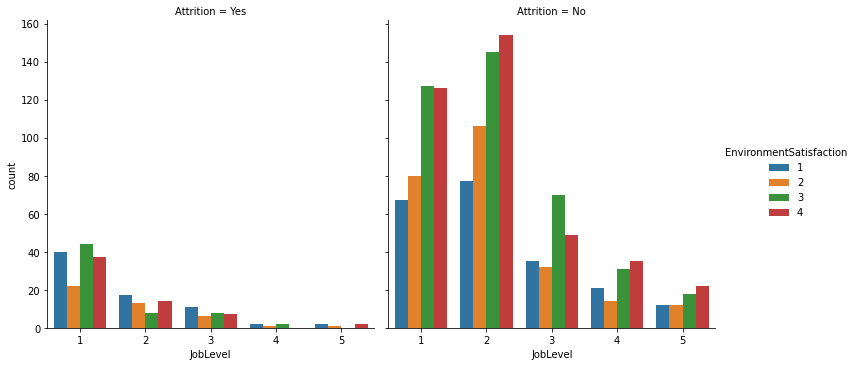

In [21]:
plt.figure(figsize=(6,4))
sns.catplot(x='JobLevel',hue='EnvironmentSatisfaction',col='Attrition',kind='count',data=df)
plt.show()

1. Employees who works with level 1 jobs are not having good environment satisfaction and those employees are most likely to leave the company.

<Figure size 432x288 with 0 Axes>

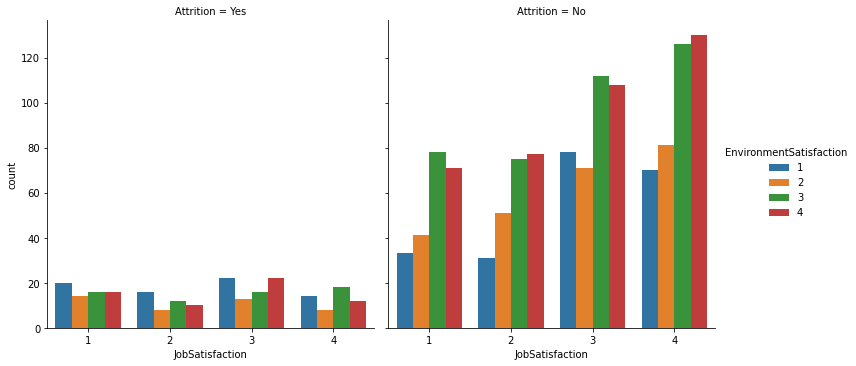

In [22]:
plt.figure(figsize=(6,4))
sns.catplot(x='JobSatisfaction',hue='EnvironmentSatisfaction',col='Attrition',kind='count',data=df)
plt.show()

1. Employees who have less Environment satisfaction and moderate job satisfation are leave the company more, followed by employees who have very less satisfaction in both environment and job satisfaction are leaving the company. 

<Figure size 432x288 with 0 Axes>

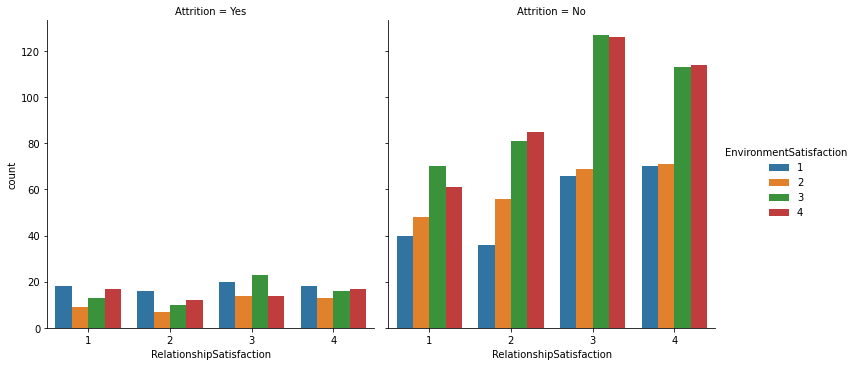

In [23]:
plt.figure(figsize=(6,4))
sns.catplot(x='RelationshipSatisfaction',hue='EnvironmentSatisfaction',col='Attrition',kind='count',data=df)
plt.show()

1. Employees who are having moderate Relationship satisfaction and less environment satisfation are leaving the company more.

<Figure size 432x288 with 0 Axes>

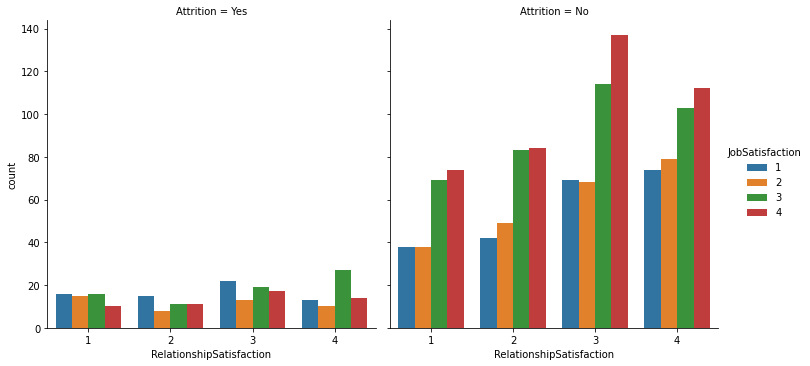

In [24]:
plt.figure(figsize=(6,4))
sns.catplot(x='RelationshipSatisfaction',hue='JobSatisfaction',col='Attrition',kind='count',data=df)
plt.show()

1. Employees who are having moderate Relationship satisfaction and less job satisfation are leaving the company more.

<Figure size 432x288 with 0 Axes>

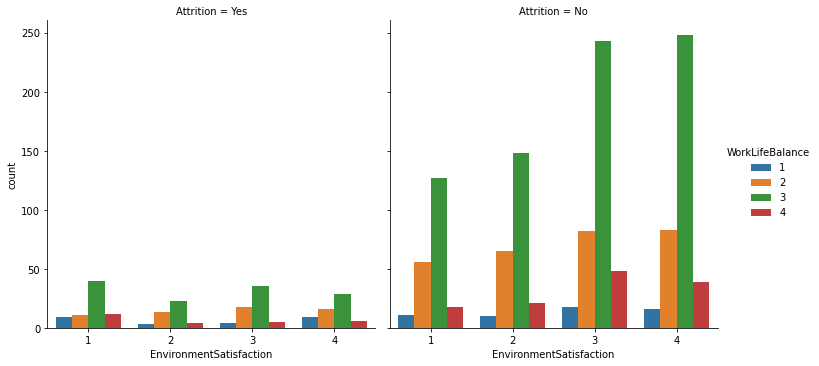

In [25]:
plt.figure(figsize=(6,4))
sns.catplot(x='EnvironmentSatisfaction',hue='WorkLifeBalance',col='Attrition',kind='count',data=df)
plt.show()

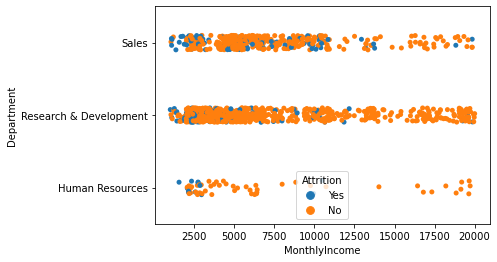

In [26]:
plt.figure(figsize=(6,4))
sns.stripplot(x='MonthlyIncome',y='Department',hue='Attrition',data=df)
plt.show()

This plot shows that employees who are getting low salary from Sales department are leaving more.

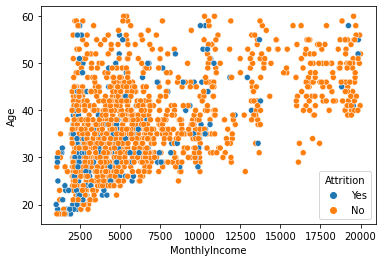

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MonthlyIncome',y='Age',hue='Attrition',data=df)
plt.show()

From this plot we can observe that employees whose age between 18 to 35 and who are getting salary below 5000 are most likely to leave the company.

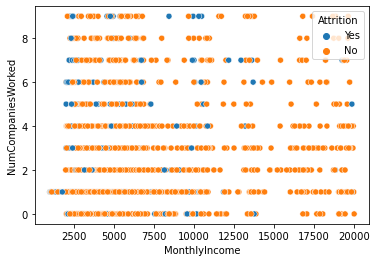

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MonthlyIncome',y='NumCompaniesWorked',hue='Attrition',data=df)
plt.show()

From the above plot we can observe that employees who worked more than 4 companies and whose salary is less than 15000 are mostly leaving the company.

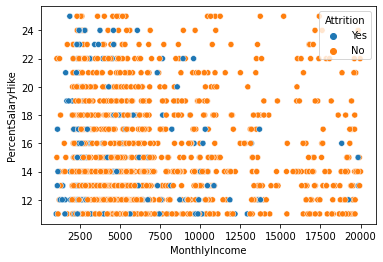

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MonthlyIncome',y='PercentSalaryHike',hue='Attrition',data=df)
plt.show()

From the above plot we can see that employees who are getting low salary with more hike likely to leave the company.

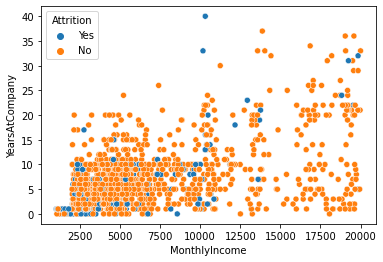

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MonthlyIncome',y='YearsAtCompany',hue='Attrition',data=df)
plt.show()

Employees whose salary less than 15000 and working less than 10 years in the company are leaving the company more.

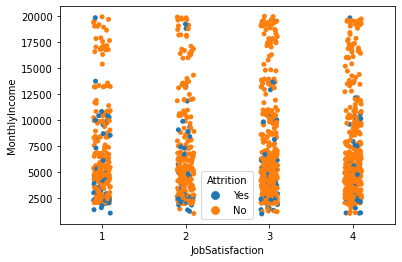

In [31]:
plt.figure(figsize=(6,4))
sns.stripplot(x='JobSatisfaction',y='MonthlyIncome',hue='Attrition',data=df)
plt.show()

Employees who are not satisfied with their jobs are mostly getting salary below 12500 and they are leaving the company more.

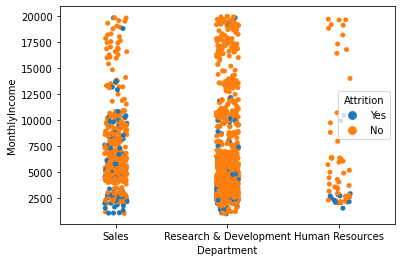

In [32]:
plt.figure(figsize=(6,4))
sns.stripplot(x='Department',y='MonthlyIncome',hue='Attrition',data=df)
plt.show()

1. Employee from Sales department and whose job level is 1 are leaving the company more.
2. Employees whose salary is less than 15000 from Sales department are mostly leaving the company.

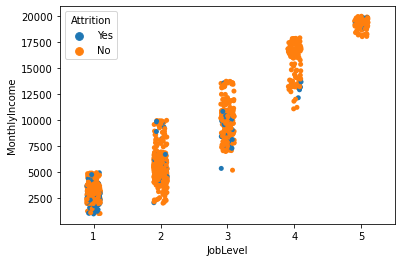

In [33]:
plt.figure(figsize=(6,4))
sns.stripplot(x='JobLevel',y='MonthlyIncome',hue='Attrition',data=df)
plt.show()

When the JobLevel increase the salary of the employee is increases.Employees works under job level 1 and 3 and getting low salary are leaving the company more.

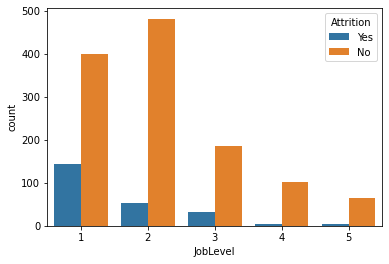

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='JobLevel',hue='Attrition',data=df)
plt.show()

From all the above observations we can see employees with low monthly income and employees who are having less environment satisfaction and employees from job level 1 and employees who got performance rating 3 are more likely to leave the company.

#### Encoding the non numeric features

In [36]:
str_categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
for i in str_categorical_features:
    df[i]=LabelEncoder().fit_transform(df[i])
df[str_categorical_features]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,0
1466,0,2,1,3,1,0,1,0,0
1467,0,2,1,1,1,4,1,0,1
1468,0,1,2,3,1,7,1,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

As we know EmployeeCount, StandardHours and Over18, EmployeeNumber,DistanceFromHome are nominal features, we will drop them.

In [40]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)
df.shape

(1470, 31)

##### Checking multi colinearity

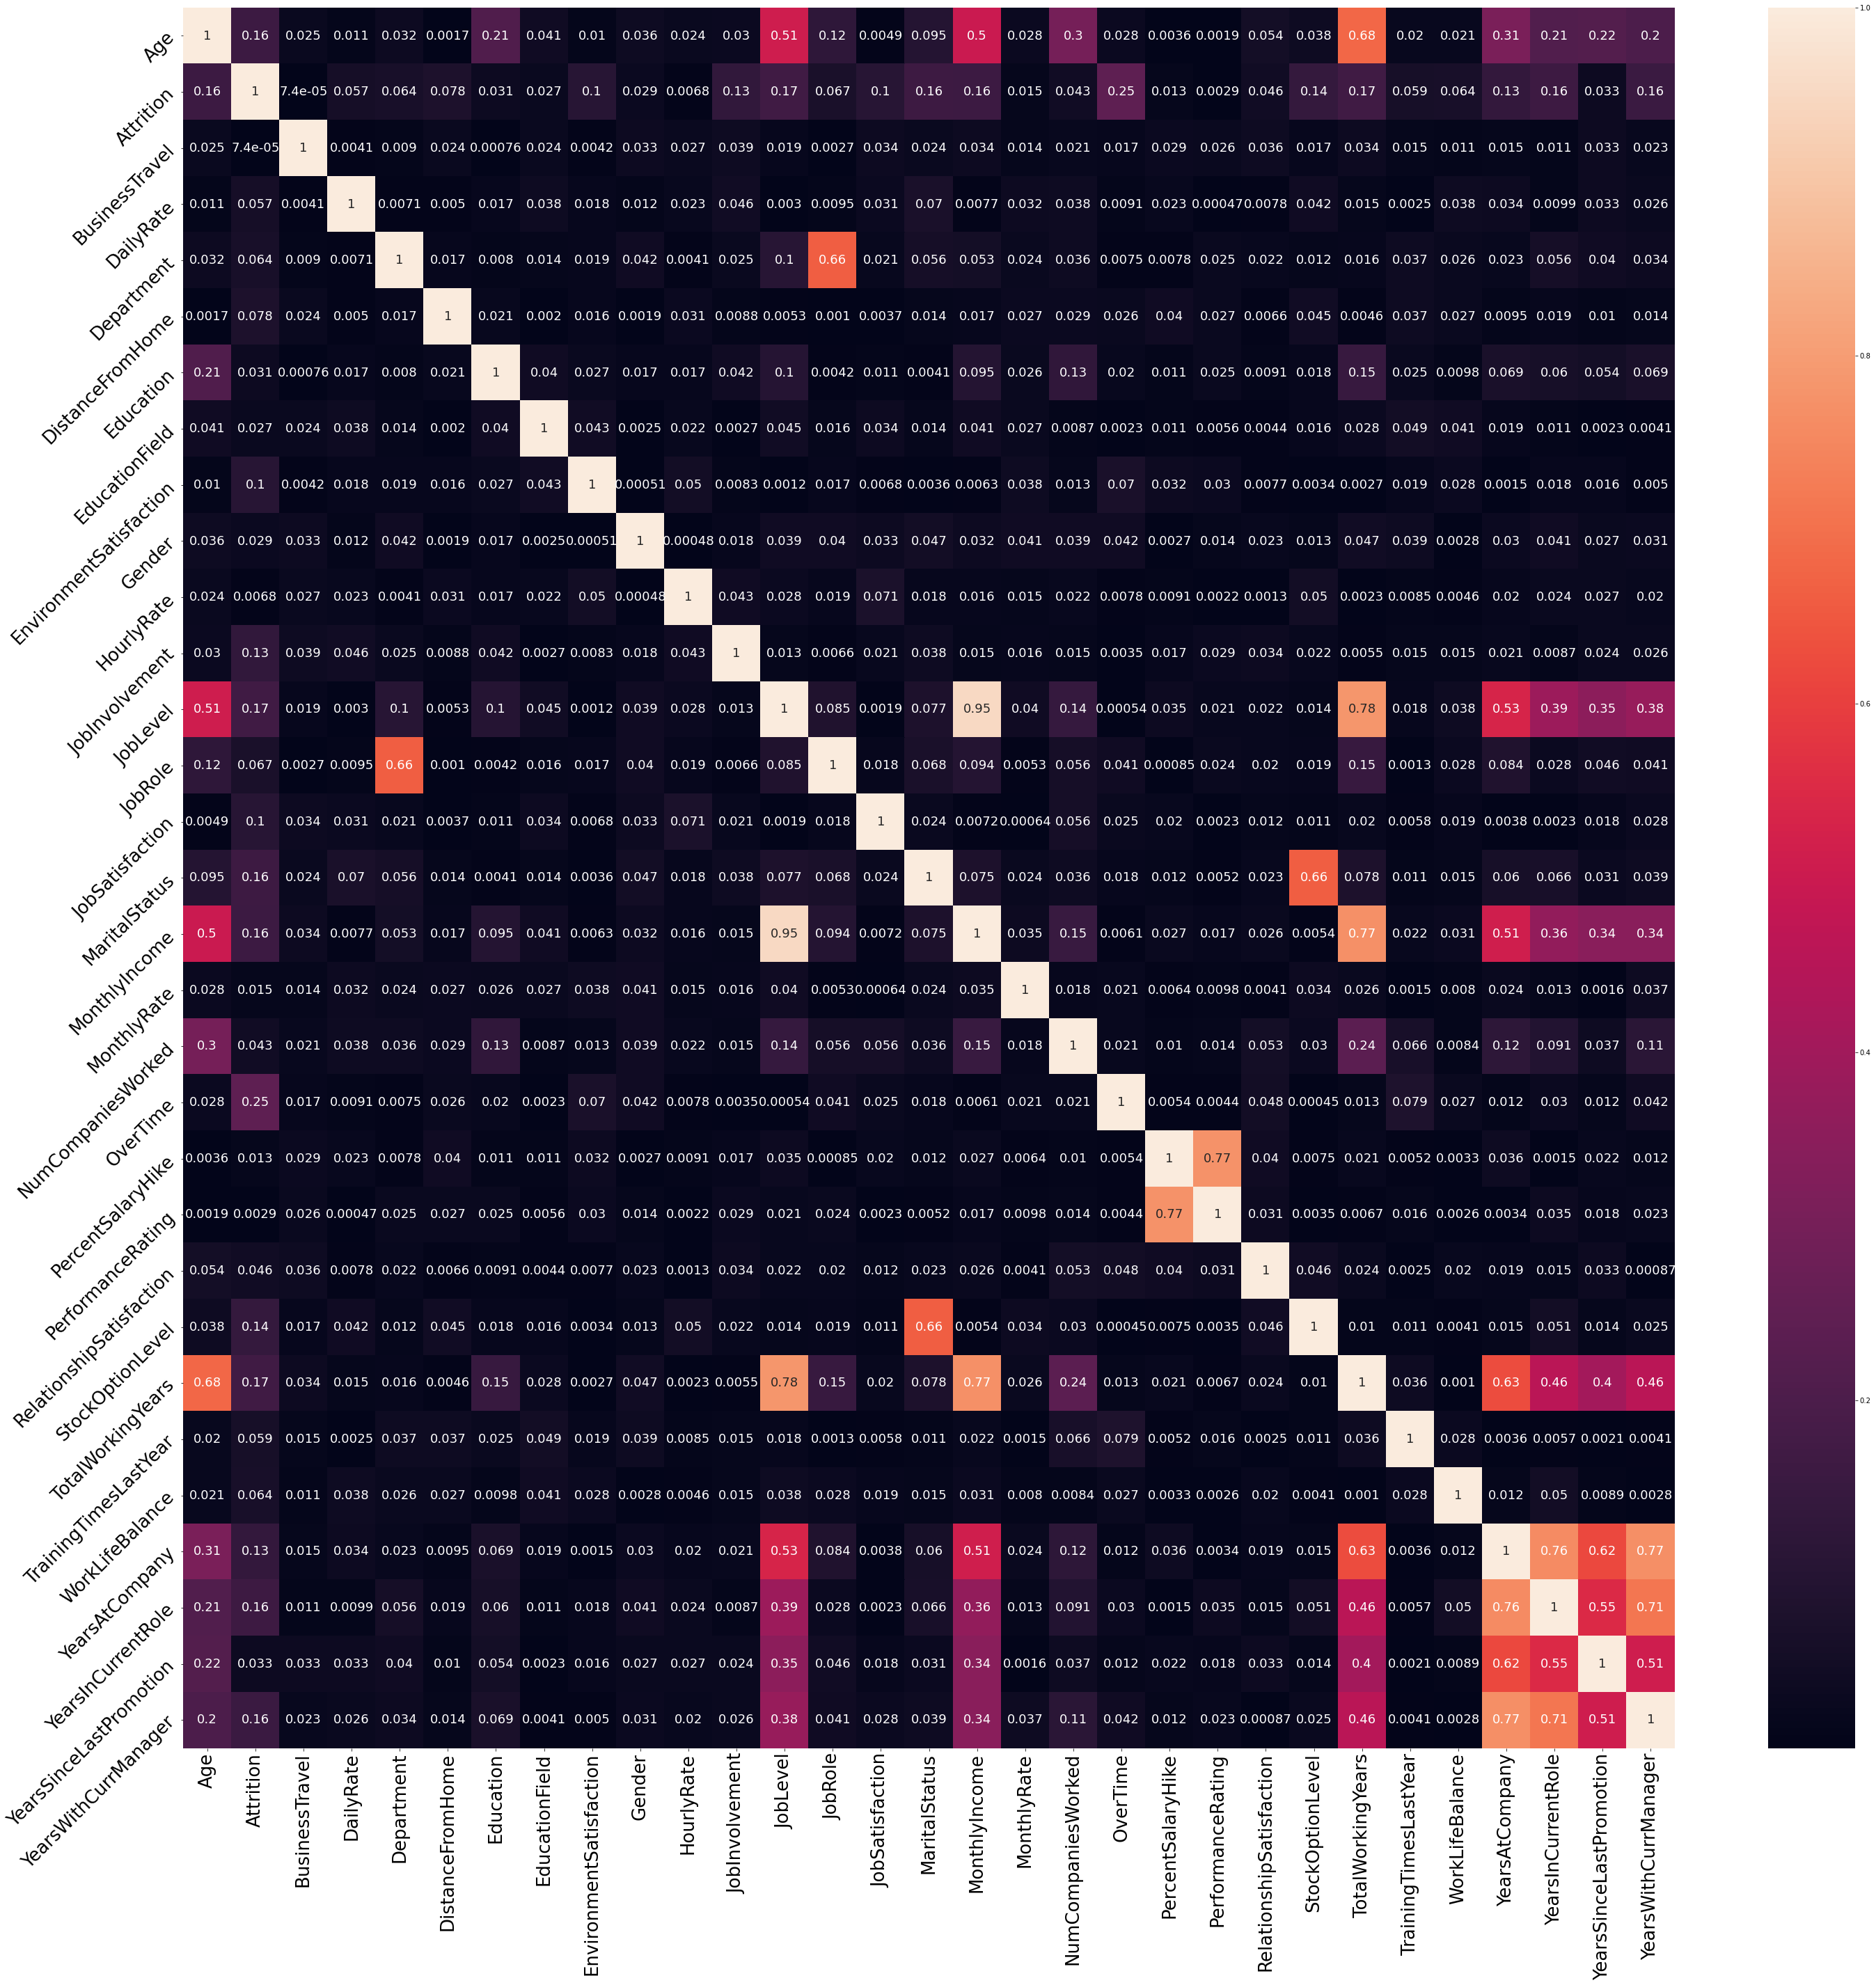

In [41]:
plt.figure(figsize=(48,46))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':18})
plt.xticks(fontsize=26,rotation=90)
plt.yticks(fontsize=26,rotation=45)
plt.show()

Observations from above heatmap
1. Job level is strongly correlated with monthly income.
2. Job level is 78% correlated with Total working years
3. Monthly Income is 77% correlated with Total working years.
4. Performance rating is 77% correlated with Percentage of salary hike.
5. Years ar company is 77% correlated with Years with current manager and 76% correlated with Years in current role.

##### Lets plot the correlation between feature and target variable using bar chart

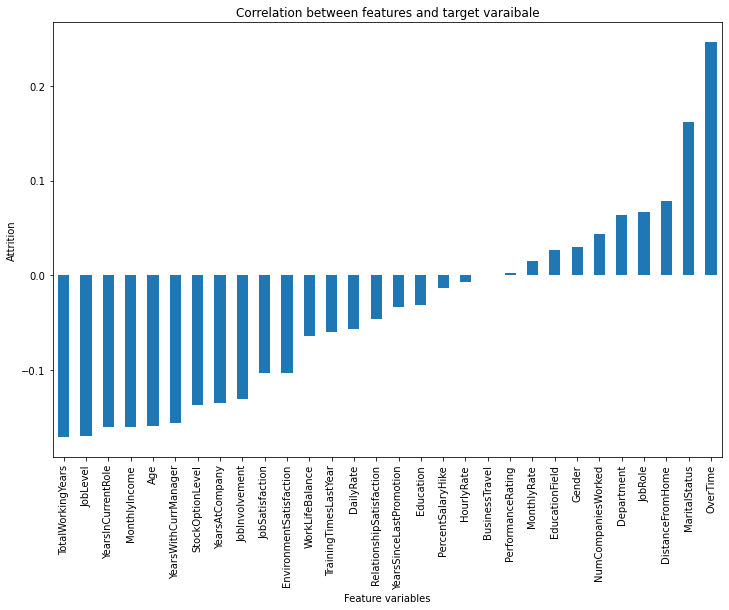

In [42]:
plt.figure(figsize=(12,8))
df.corr()['Attrition'].sort_values().drop(['Attrition']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Attrition')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

From the above plot we can see that Business Travel is not having any correlation with target Attrition. Lets drop Business Travel.

In [43]:
df.drop(['BusinessTravel'],axis=1,inplace=True)
df.shape

(1470, 30)

### Removing Outliers

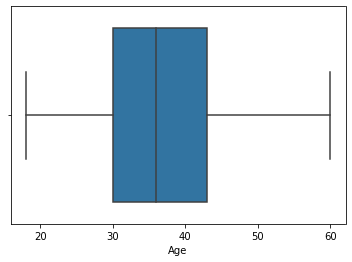

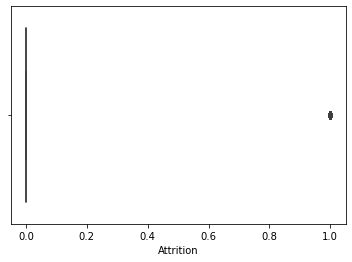

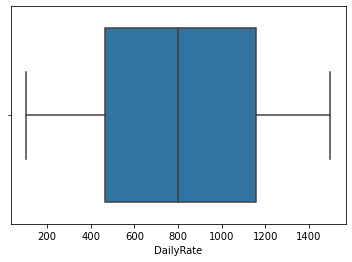

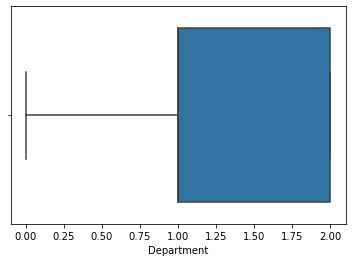

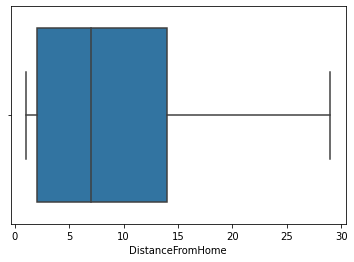

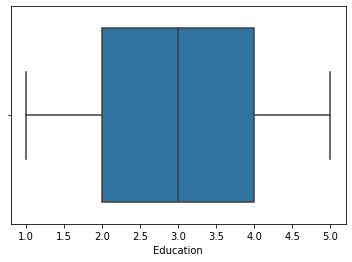

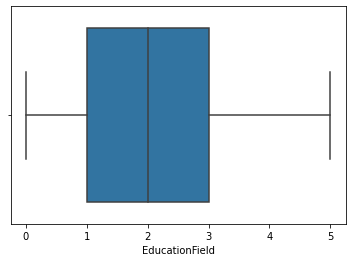

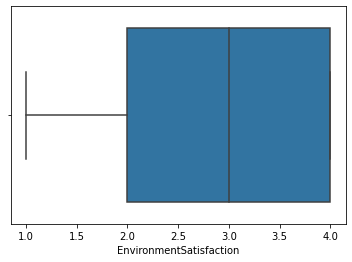

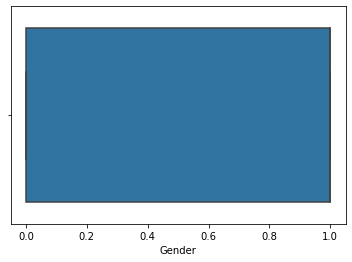

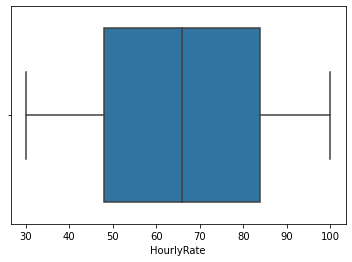

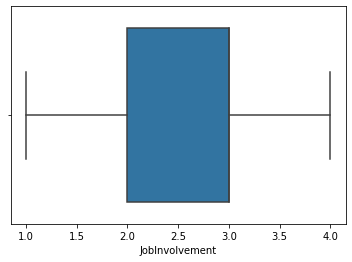

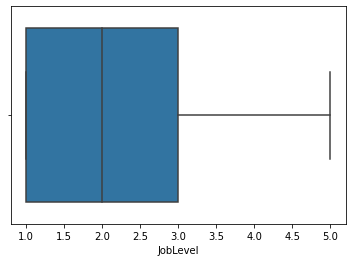

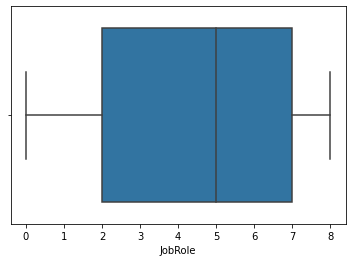

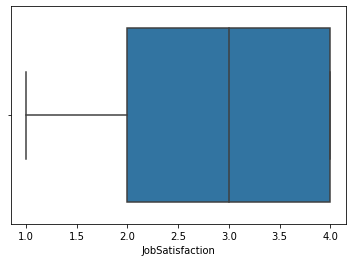

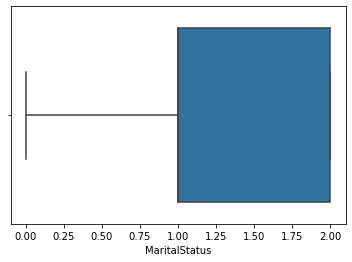

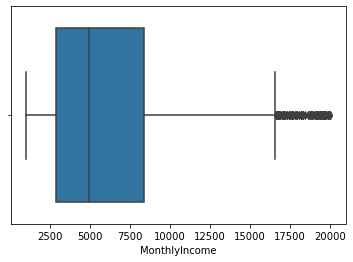

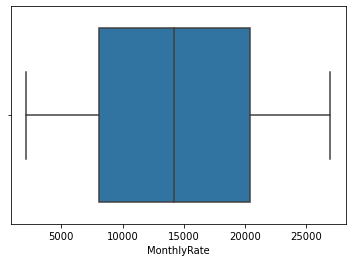

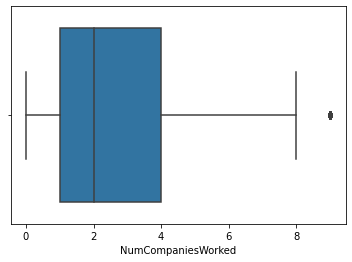

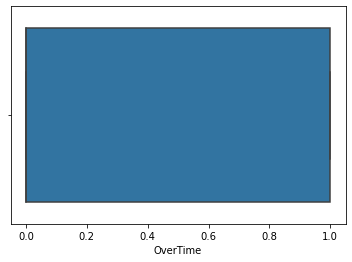

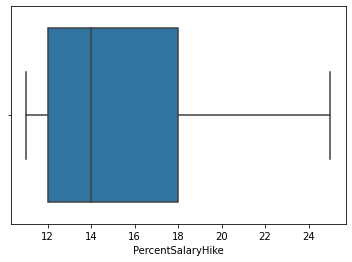

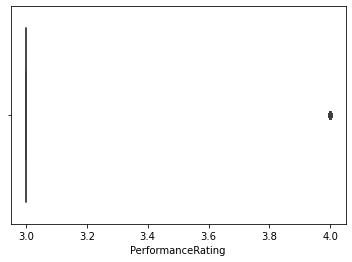

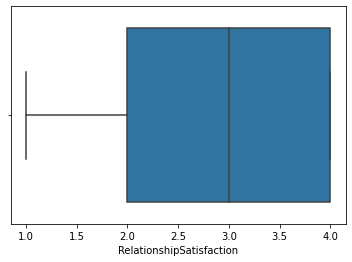

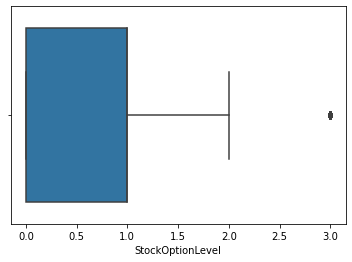

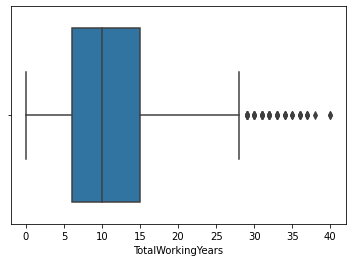

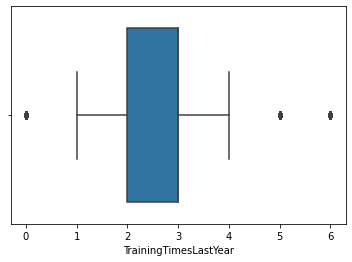

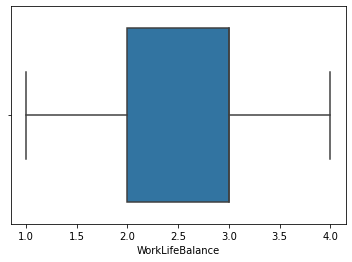

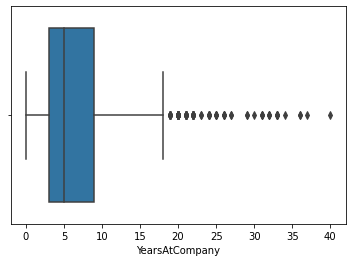

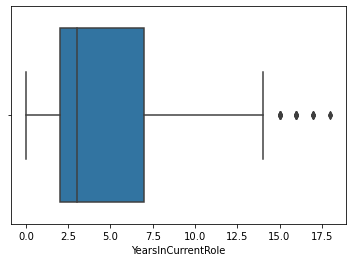

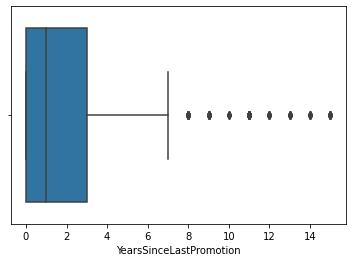

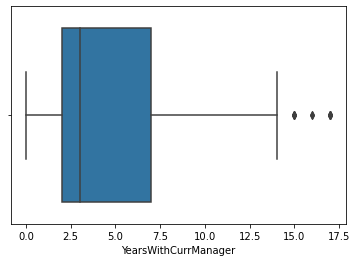

In [47]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [48]:
outliers_features=['TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [49]:
from scipy.stats import zscore
score=zscore(df[outliers_features])
filters=(score<3).all(axis=1)
new_df=df[filters]
print(df.shape,new_df.shape)

(1470, 30) (1387, 30)


We removed 83 records using zscore.

##### DataLoss

In [50]:
loss=((df.shape[0]-new_df.shape[0])/df.shape[0])*100
loss

5.646258503401361

We lost 5.6% of data from our dataset.

### Remove Data skewness

In [51]:
new_df.skew().sort_values()

WorkLifeBalance            -0.557100
JobInvolvement             -0.501401
Gender                     -0.417296
JobRole                    -0.386843
JobSatisfaction            -0.345612
EnvironmentSatisfaction    -0.325285
RelationshipSatisfaction   -0.295686
Education                  -0.289024
MaritalStatus              -0.160952
HourlyRate                 -0.030481
DailyRate                  -0.017078
MonthlyRate                 0.030596
Department                  0.183919
Age                         0.472280
EducationField              0.544868
TrainingTimesLastYear       0.577614
YearsWithCurrManager        0.694506
YearsInCurrentRole          0.726675
PercentSalaryHike           0.800592
OverTime                    0.954751
DistanceFromHome            0.954752
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
NumCompaniesWorked          1.037715
JobLevel                    1.126075
YearsAtCompany              1.248623
MonthlyIncome               1.544770
Y

1. We have skewness in the features EducationField,TrainingTimesLastYear,PercentSalaryHike,YearsWithCurrManager, YearsInCurrentRole,OverTime,StockOptionLevel,JobLevel,NumCompaniesWorked,TotalWorkingYears,MonthlyIncome,YearsAtCompany, Attrition,PerformanceRating,YearsSinceLastPromotion.
2. Categorical features - EducationField,OverTime,StockOptionLevel,JobLevel,Attrition,PerformanceRating.
3. We need to remove skewness from only continous features, so we are not going to remove skewness for catgorical features.

In [52]:
skewed_features=['TrainingTimesLastYear','MonthlyIncome','PercentSalaryHike','YearsWithCurrManager','YearsInCurrentRole','NumCompaniesWorked','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','DistanceFromHome']
from sklearn.preprocessing import PowerTransformer
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])
print(new_df.skew().sort_values())

WorkLifeBalance            -0.557100
JobInvolvement             -0.501401
Gender                     -0.417296
JobRole                    -0.386843
JobSatisfaction            -0.345612
EnvironmentSatisfaction    -0.325285
RelationshipSatisfaction   -0.295686
Education                  -0.289024
MaritalStatus              -0.160952
YearsWithCurrManager       -0.070570
YearsInCurrentRole         -0.069631
HourlyRate                 -0.030481
YearsAtCompany             -0.025230
DailyRate                  -0.017078
TotalWorkingYears          -0.009666
DistanceFromHome           -0.008149
NumCompaniesWorked          0.016175
MonthlyIncome               0.027700
MonthlyRate                 0.030596
TrainingTimesLastYear       0.057949
PercentSalaryHike           0.112128
Department                  0.183919
YearsSinceLastPromotion     0.212301
Age                         0.472280
EducationField              0.544868
OverTime                    0.954751
StockOptionLevel            0.962332
J

Now we do not have skweness in any of the continous values.

##### lets split features and target variable

In [53]:
X=new_df.drop(['Attrition'],axis=1)
y=new_df['Attrition']
print(X.shape)
print(y.shape)

(1387, 29)
(1387,)


In [54]:
print(y.value_counts())

0    1158
1     229
Name: Attrition, dtype: int64


##### Removing Multicolinearity using VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
19,66.411533,PerformanceRating
0,30.181090,Age
10,23.676385,JobLevel
24,15.868584,WorkLifeBalance
9,15.422943,JobInvolvement
2,13.712749,Department
8,11.399578,HourlyRate
4,9.326270,Education
11,8.518147,JobRole
20,7.306349,RelationshipSatisfaction


In [56]:
X=X.drop(['PerformanceRating'],axis=1)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
0,27.507029,Age
10,21.899467,JobLevel
23,14.872795,WorkLifeBalance
9,14.824642,JobInvolvement
2,13.618953,Department
8,10.936454,HourlyRate
4,9.158999,Education
11,8.518060,JobRole
6,7.217593,EnvironmentSatisfaction
19,7.216474,RelationshipSatisfaction


In [58]:
X=X.drop(['Age'],axis=1)

In [59]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
9,21.042175,JobLevel
22,14.655060,WorkLifeBalance
8,14.353127,JobInvolvement
1,13.587502,Department
7,10.600889,HourlyRate
3,8.645337,Education
10,8.517925,JobRole
5,7.113879,EnvironmentSatisfaction
18,7.087220,RelationshipSatisfaction
11,6.947548,JobSatisfaction


In [60]:
X=X.drop(['JobLevel'],axis=1)

In [61]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
21,14.058411,WorkLifeBalance
8,13.967515,JobInvolvement
1,13.472430,Department
7,10.474682,HourlyRate
3,8.607290,Education
9,8.517888,JobRole
17,6.943722,RelationshipSatisfaction
5,6.928142,EnvironmentSatisfaction
10,6.842843,JobSatisfaction
22,6.272531,YearsAtCompany


In [62]:
X=X.drop(['WorkLifeBalance'],axis=1)

In [63]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
8,13.578840,JobInvolvement
1,13.395511,Department
7,10.271825,HourlyRate
9,8.515609,JobRole
3,8.453900,Education
17,6.818168,RelationshipSatisfaction
10,6.785880,JobSatisfaction
5,6.782385,EnvironmentSatisfaction
21,6.264927,YearsAtCompany
11,5.473227,MaritalStatus


In [64]:
X=X.drop(['JobInvolvement'],axis=1)

In [65]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
1,13.375450,Department
7,9.767139,HourlyRate
8,8.498354,JobRole
3,8.142914,Education
5,6.690420,EnvironmentSatisfaction
9,6.657127,JobSatisfaction
16,6.636758,RelationshipSatisfaction
20,6.264926,YearsAtCompany
10,5.419884,MaritalStatus
12,4.824914,MonthlyRate


In [66]:
X=X.drop(['Department'],axis=1)

In [67]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
6,9.643682,HourlyRate
2,8.119691,Education
4,6.662101,EnvironmentSatisfaction
15,6.630728,RelationshipSatisfaction
8,6.606602,JobSatisfaction
19,6.264925,YearsAtCompany
9,5.362120,MaritalStatus
11,4.808196,MonthlyRate
0,4.805124,DailyRate
7,4.244091,JobRole


In [68]:
X.shape

(1387, 23)

After removing the multicolinearlity between features we have 23 columns in X.

##### Applying standard scalar on feature varibles

In [69]:
from sklearn.preprocessing import StandardScaler
X_sc=StandardScaler().fit_transform(X)

In [70]:
X_sc.shape

(1387, 23)

##### Importing libraries

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve

##### Finding best Random state

In [72]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print("Accuracy: ",m_acc,"Best RS: ",b_rs)

Accuracy:  0.899135446685879 Best RS:  166


##### Splitting the train test set using best Random state found

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=166)

In [89]:
print(X_train.shape,y_train.shape)

(1110, 23) (1110,)


##### Applying SMOTE balancing technique

As we have imbalanced data in out dataset, we will apply SMOTE resampling technique on our training data.

In [90]:
from imblearn.over_sampling import SMOTE

In [76]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (1040, 23) (1040,)
Training set size after applying SMOTE: (1714, 23) (1714,)


In [77]:
print(X_test.shape,y_test.shape)

(347, 23) (347,)


### Building base models - Model selection

In [91]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()
svc=SVC()

In [79]:
models=[lr,rf_clf,gb_clf,dt_clf,ab_clf,knn_clf,svc]

In [80]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classsification Report: \n",classification_report(y_test,y_pred),'\n')
   
    

Metrics for  LogisticRegression()
Accuracy score:  0.7492795389048992
ROC AUC Score:  0.8002311136790409
Confusion Matrix: 
 [[220  81]
 [  6  40]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.97      0.73      0.83       301
           1       0.33      0.87      0.48        46

    accuracy                           0.75       347
   macro avg       0.65      0.80      0.66       347
weighted avg       0.89      0.75      0.79       347
 

Metrics for  RandomForestClassifier()
Accuracy score:  0.8818443804034583
ROC AUC Score:  0.6740574895276614
Confusion Matrix: 
 [[288  13]
 [ 28  18]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       301
           1       0.58      0.39      0.47        46

    accuracy                           0.88       347
   macro avg       0.75      0.67      0.70       347
weighted avg       0.87      0.88      0.87    

##### Plot ROC AUC Curve

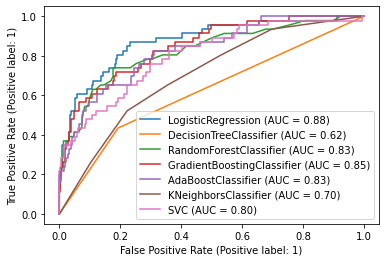

In [81]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(ab_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(svc,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

##### Cross validation check

In [82]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.7606030698906578
For Model  RandomForestClassifier()
Mean Accuracy:  0.8557826662857441
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.8557852634859622
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7534114224865596
For Model  AdaBoostClassifier()
Mean Accuracy:  0.8406747526166793
For Model  KNeighborsClassifier()
Mean Accuracy:  0.6286678960081032
For Model  SVC()
Mean Accuracy:  0.8154143832948082


##### Based on the Cross validation score and number of False prediction count, GradientBoostingClassifier performs well with our data set.

### Final Model - GradientBoostingClassifier

In [83]:
print(X_sc.shape,y.shape)

(1387, 23) (1387,)


##### Hyper parameter tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param={'learning_rate':[0.1,0.5,1],
       'max_depth':[3,5,8,9],
       'max_features':['auto', 'sqrt', 'log2'],
      'n_estimators':[100,130]}
#param={'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.1,0.5,1],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[90,100,130]}
grd_srch=GridSearchCV(GradientBoostingClassifier(),param_grid=param)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

GradientBoostingClassifier(learning_rate=0.5, max_depth=9, max_features='sqrt')
0.9370108945833973


In [95]:
m_acc=0
b_rs=0
for i in range(1,100):
    final_model=GradientBoostingClassifier(learning_rate=0.5,max_depth=9, max_features='sqrt',random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=GradientBoostingClassifier(learning_rate=0.5,max_depth=9, max_features='sqrt', n_estimators=130,random_state=b_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Accuracy:  0.9927797833935018 Best RS:  6
0.9927797833935018
0.9761904761904762
[[235   0]
 [  2  40]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       1.00      0.95      0.98        42

    accuracy                           0.99       277
   macro avg       1.00      0.98      0.99       277
weighted avg       0.99      0.99      0.99       277



In [96]:
final_model=GradientBoostingClassifier(learning_rate=0.5,max_depth=9, max_features='sqrt',random_state=6)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.9927797833935018
ROC AUC Score:  0.9761904761904762
Confusion Matrix: 
 [[235   0]
 [  2  40]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       1.00      0.95      0.98        42

    accuracy                           0.99       277
   macro avg       1.00      0.98      0.99       277
weighted avg       0.99      0.99      0.99       277



##### We able to build a model with 99% of accuracy and 2 false prediction values.

### Model Saving

In [98]:
import pickle

In [99]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/HRAnalyticsAttrition.pkl','wb'))

In [100]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/HRAnalyticsAttrition.pkl','rb'))

In [101]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result_table

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
272,0,0
273,0,0
274,0,0
275,0,0
